<a href="https://colab.research.google.com/github/Kadiri-mikodex/PotentialCustomer_Prediction/blob/main/Michael_Kadiri_Full_Code_Version_Potential_Customers_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><font color="sky-blue">Please turn on the dark-mode of the colab for better color alignment

In [ ]:
# Author: Michael T. Kadiri
# Project: Machine Learning Model for Lead Conversion to paid customers
# Date: September 30, 2024


# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## **<font color="33aaee">Importing the libraries and overview of the dataset**

In [ ]:
# Importing necessary libraries for data analysis and machine learning:
# ---------------------------------------------------------------------
import pandas as pd # pandas: For data manipulation and analysis, primarily using DataFrames.
import numpy as np # numpy: For numerical operations on arrays and matrices.
import matplotlib.pyplot as plt # matplotlib.pyplot: For creating static, animated, and interactive visualizations.
import seaborn as sns # seaborn: For statistical data visualization based on matplotlib, offering more attractive and informative plots.

# Importing tools for data preprocessing and model selection:
# -----------------------------------------------------------
# StandardScaler: For standardizing features by removing the mean and scaling to unit variance (z-score scaling). This helps improve model performance.
from sklearn.preprocessing import StandardScaler
# train_test_split: For splitting the dataset into training and testing subsets to evaluate model performance and avoid overfitting.
from sklearn.model_selection import train_test_split

# Importing various machine learning algorithms for classification:
# -----------------------------------------------------------------
# LogisticRegression: A linear model for binary classification, modeling the probability of a certain class or event.
from sklearn.linear_model import LogisticRegression
# SVC (Support Vector Classifier): A powerful algorithm for classification, finding a hyperplane that best separates data points of different classes.
from sklearn.svm import SVC
# DecisionTreeClassifier: A non-parametric supervised learning method for classification and regression, creating a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.
from sklearn.tree import DecisionTreeClassifier
# BaggingClassifier: An ensemble method that fits base classifiers (e.g., decision trees) on random subsets of the original dataset and aggregates their individual predictions.
from sklearn.ensemble import BaggingClassifier
# RandomForestClassifier: An ensemble method similar to BaggingClassifier, but it also introduces randomness in the feature selection for each decision tree, improving model diversity and performance.
from sklearn.ensemble import RandomForestClassifier

# Importing tools for evaluating the performance of machine learning models:
#---------------------------------------------------------------------------
# metrics: A module containing various metrics functions for model evaluation, such as accuracy, precision, recall, F1-score, etc.
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, recall_score, auc, roc_curve, roc_auc_score, accuracy_score, f1_score, make_scorer
"""
confusion_matrix: A table used to describe the performance of a classification model on a set of test data for which the true values are known.
classification_report: A text report showing the main classification metrics (precision, recall, F1-score) for each class and their average.
precision_recall_curve: Computes precision-recall pairs for different probability thresholds.
recall_score: Calculates the recall (true positive rate) of a classifier."""

# tree: A module for visualizing decision trees (useful for interpreting DecisionTreeClassifier models).
from sklearn import tree
# Importing a tool for hyperparameter tuning to improve model performance:
# GridSearchCV: A method that systematically searches a grid of hyperparameter values to find the best combination for a given model and dataset.
from sklearn.model_selection import GridSearchCV

# Importing a tool for handling warnings:
# ---------------------------------------
# Ignoring warning messages that might be generated during the execution of the code:
# warnings: A module for issuing warning messages to users.
# filterwarnings("ignore"): Filters out all warnings to avoid cluttering the output.
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

## Loading the Data Set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Python Course/ExtraaLearn.csv")

## Overview of Dataset

## View the first and last five rows

In [ ]:
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [ ]:
df.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


## Observations


*   There are 15 columns in the data.
*   10 are categorical while 5 are not.



## Understand the Shape of the data

In [ ]:
df.shape

(4612, 15)

## Observations


*   Data set has 4612 rows and 15 columns



## Data types of the columns of dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

## Observations

*   There are 5 numerical variables which are: age, website visits, time spent on websites, page views per website and status.
*   All other variables are categorical.
*   All the columns have 4612 non-null values, i.e., there are no missing values in the data.








In [ ]:
df.isnull().values.any()

False


*   Confirmed there are no missing values in the data.



## Unique value number in each column

In [ ]:
df.nunique()

,0
ID,4612
age,46
current_occupation,3
first_interaction,2
profile_completed,3
website_visits,27
time_spent_on_website,1623
page_views_per_visit,2414
last_activity,3
print_media_type1,2


Observation:

* We can drop the column - ID as it is unique for each lead and will not add any value to the model.


Dropping the unique values column

In [ ]:
# Check the actual column names in your DataFrame
print(df.columns)

Index(['ID', 'age', 'current_occupation', 'first_interaction',
       'profile_completed', 'website_visits', 'time_spent_on_website',
       'page_views_per_visit', 'last_activity', 'print_media_type1',
       'print_media_type2', 'digital_media', 'educational_channels',
       'referral', 'status'],
      dtype='object')


In [ ]:
# try droping the column
df.drop(columns='ID', inplace=True)

## Making a list of all numerical and categorical columns

In [ ]:
#creating numerical column
num_cols = ['age','website_visits','time_spent_on_website','page_views_per_visit','status']

#creating categorical column
cat_cols = ['current_occupation','first_interaction', 'profile_completed','last_activity',
            'print_media_type1', 'print_media_type2','digital_media', 'educational_channels', 'referral']

## **<font color="ffff">Exploratory Data Analysis and Data Preprocessing**

### **Univariate analysis of numerical columns**

In [ ]:
# Checking summary statistics
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.00000,46.20121,13.16145,18.00000,36.00000,51.00000,57.00000,63.00000
website_visits,4612.00000,3.56678,2.82913,0.00000,2.00000,3.00000,5.00000,30.00000
time_spent_on_website,4612.00000,724.01127,743.82868,0.00000,148.75000,376.00000,1336.75000,2537.00000
page_views_per_visit,4612.00000,3.02613,1.96812,0.00000,2.07775,2.79200,3.75625,18.43400
status,4612.00000,0.29857,0.45768,0.00000,0.00000,0.00000,1.00000,1.00000


## Observations:
1. Age: The average age of the leads is approximately 46 years, with a standard deviation of about 13.6 years. This suggests there is a moderate spread in the age of leads. The age range is from 18 to 63 years, indicating a wide variety of age groups engaging with ExtraaLearn.
2. Website visits:
  On average, leads visited the website about 3.6 times. However, the maximum visits recorded are 30, suggesting some highly engaged individuals.
3. Time spent on website: The average time spent on the website is about 724 minutes, but there's a significant variation, as seen with the standard deviation of 743.23 minutes.Some leads spend up to 2537 minutes, which are highly engaged users, whereas the minimum time spent is 0 minutes, likely indicating quick drop-offs.
4. Page views per visit: Leads view an average of about 3 pages per visit, with some viewing up to 18.43 pages. This metric helps gauge the depth of interest and engagement during each visit.
5. Status: About 29.87% of the leads have converted to paid customers. This conversion rate can be a baseline to improve upon with targeted marketing and personalized engagement strategies.

## Let's explore these variables in some more depth by observing their distributions

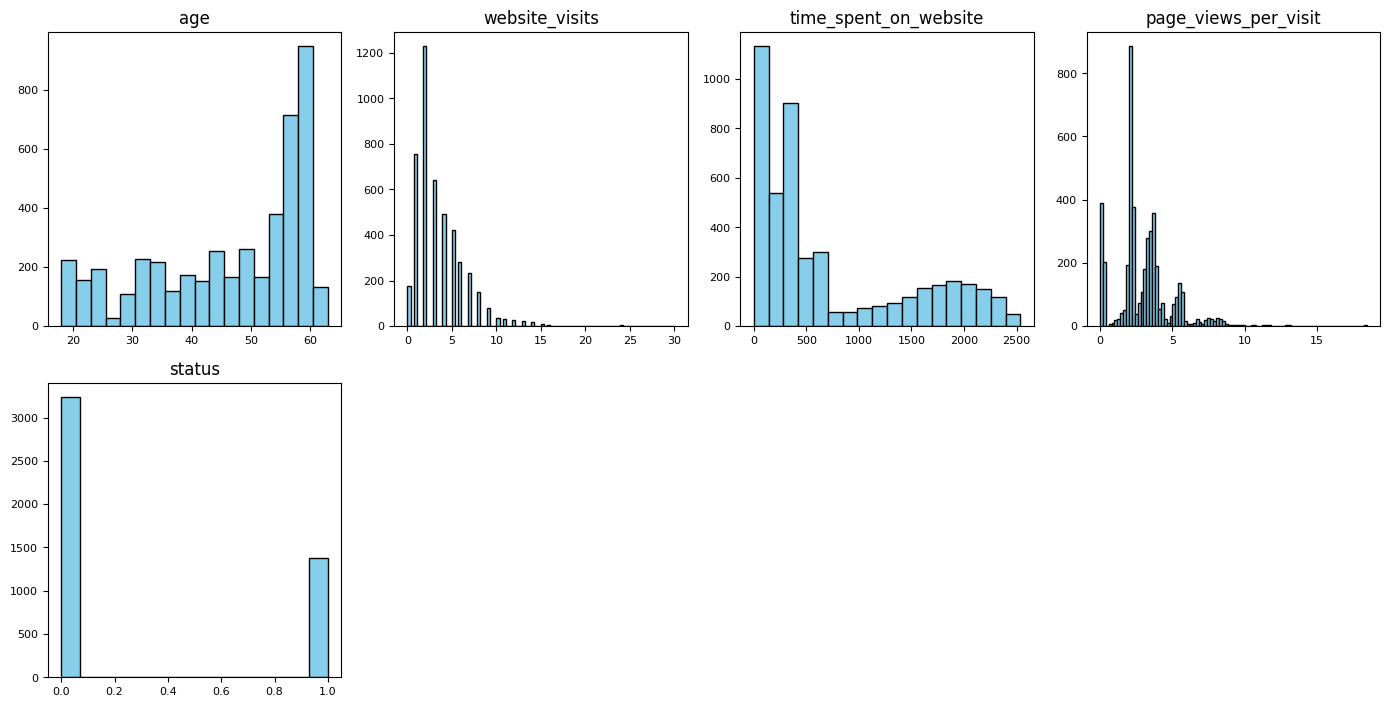

In [ ]:
# Create a grid of histograms to visualize the distribution of numerical features
df[num_cols].hist(
    figsize=(14, 14), # Set the overall figure size for the grid of histograms
    layout=(4, 4), # Arrange histograms in a 4x4 grid layout (adjust as needed)
    bins='auto', # Automatically determine the optimal number of bins for each histogram

    # Customize the appearance of the histograms
    color='skyblue',        # Fill color for the histogram bars
    edgecolor='black',      # Outline color for the bars
    linewidth=1.0,          # Width of the bar outlines
    grid=False,             # Turn off the grid lines in each histogram

    # Adjust font sizes for axis labels
    xlabelsize=8,           # Font size for x-axis labels
    ylabelsize=8,           # Font size for y-axis labels

    # Control rotation of axis labels (0 = no rotation)
    xrot=0, yrot=0
)

# Adjust subplot parameters for a tight layout, preventing overlap
plt.tight_layout()

# Display the figure containing all the histograms
plt.show()


## Observations

*  **The distribution of ages** appears to be roughly normally distributed with a slight skew towards older age groups, peaking in the 50-60 age range. This might indicate that middle-aged individuals are more engaged with ExtraaLearn offerings.

*  **Website visits**.This histogram shows a right-skewed distribution, where a large number of leads have visited the website only a few times (0-5 visits). Fewer leads have visited the website many times, but a noticeable tail extends towards 30 visits. This suggests that while most leads are somewhat engaged, there are a few highly engaged individuals.

* **Time spent on the website** is also right-skewed. Most leads spend relatively short periods (under 500 minutes), with a secondary peak around 1500 minutes. A long tail extends to 2500 minutes, indicating some leads spend a significant amount of time on the website, which may be a strong indicator of interest.

* **The distribution of page views per visit** is also right-skewed with most leads viewing fewer than 5 pages per visit, suggesting that either the website content is quickly consumed or it does not engage the leads enough to browse more pages.

*  **The histogram for status** shows that the vast majority of leads do not convert to paying customers, with a conversion rate of about 30% as observed from the descriptive statistics. The conversion rate needs to be increased, possibly by focusing on leads that show higher engagement metrics like those who spend more time or view more pages on the website.



Univariate analysis for categorical variables

In [ ]:
# Printing the % sub categories of each category
for i in cat_cols:
    print(df[i].value_counts(normalize=True))
    print('*'*40)

current_occupation
Professional   0.56722
Unemployed     0.31245
Student        0.12034
Name: proportion, dtype: float64
****************************************
first_interaction
Website      0.55117
Mobile App   0.44883
Name: proportion, dtype: float64
****************************************
profile_completed
High     0.49089
Medium   0.48591
Low      0.02320
Name: proportion, dtype: float64
****************************************
last_activity
Email Activity     0.49393
Phone Activity     0.26756
Website Activity   0.23851
Name: proportion, dtype: float64
****************************************
print_media_type1
No    0.89224
Yes   0.10776
Name: proportion, dtype: float64
****************************************
print_media_type2
No    0.94948
Yes   0.05052
Name: proportion, dtype: float64
****************************************
digital_media
No    0.88573
Yes   0.11427
Name: proportion, dtype: float64
****************************************
educational_channels
No    0.84714
Y

## Visual representation of the categorical variable data

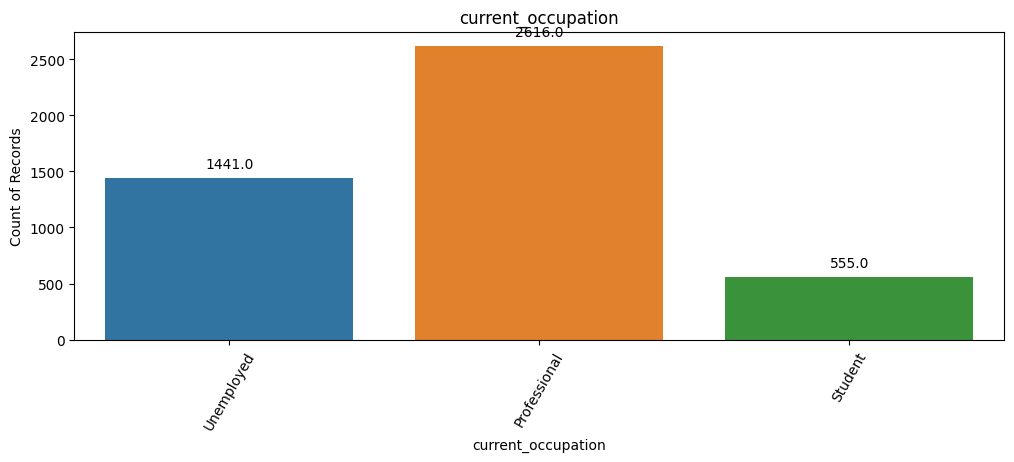

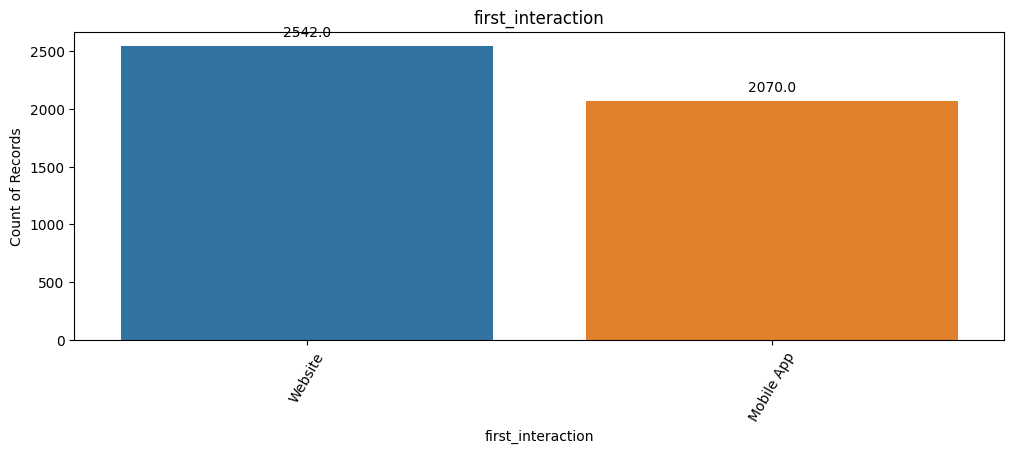

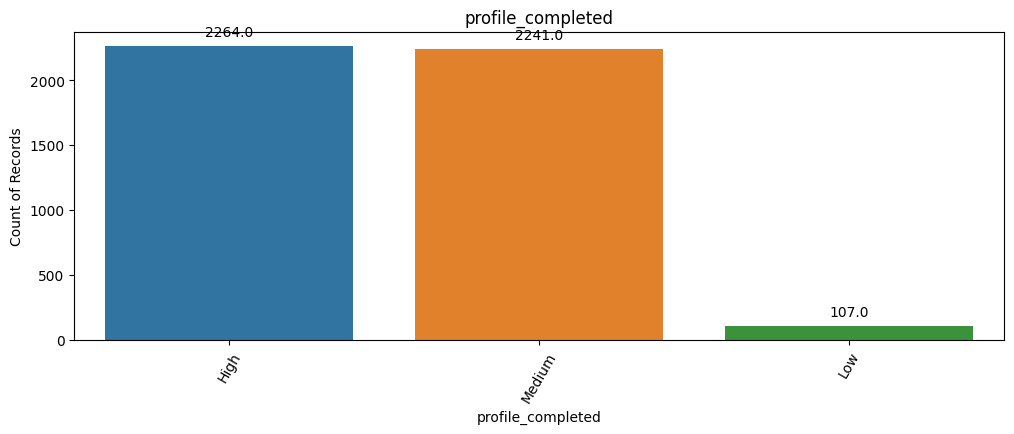

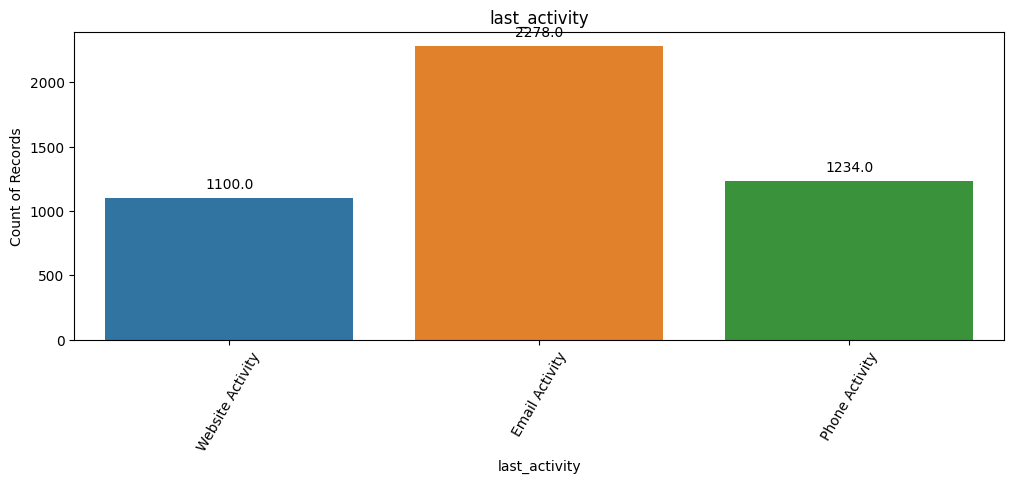

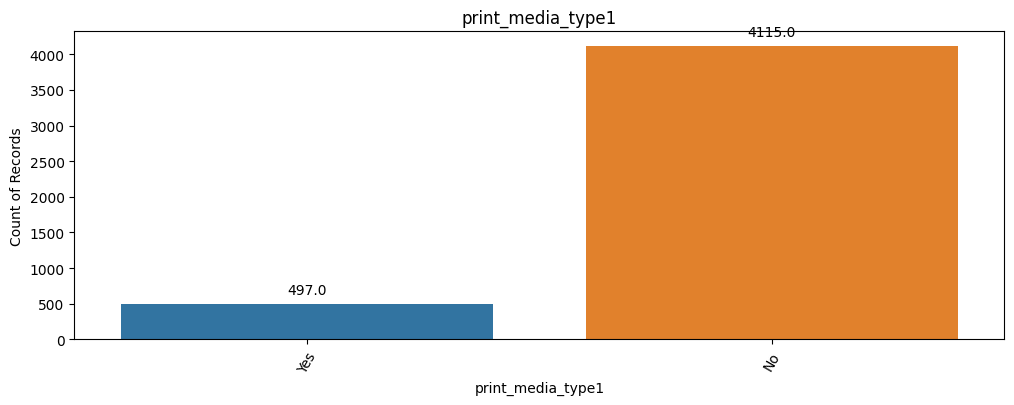

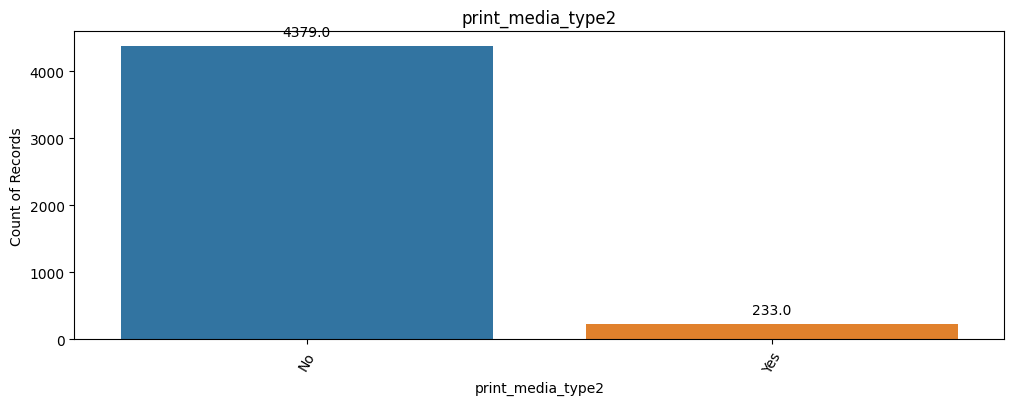

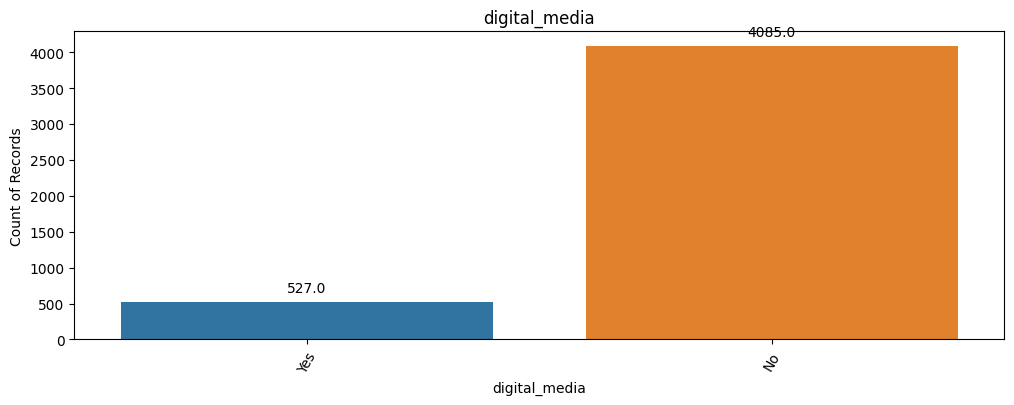

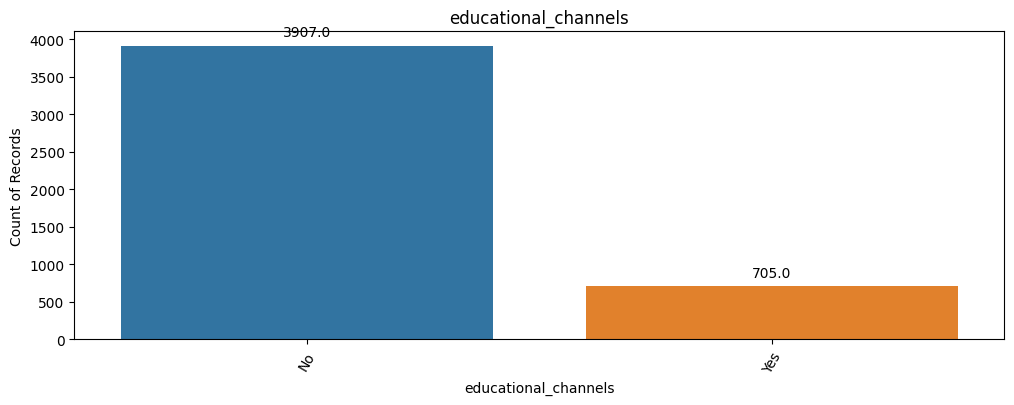

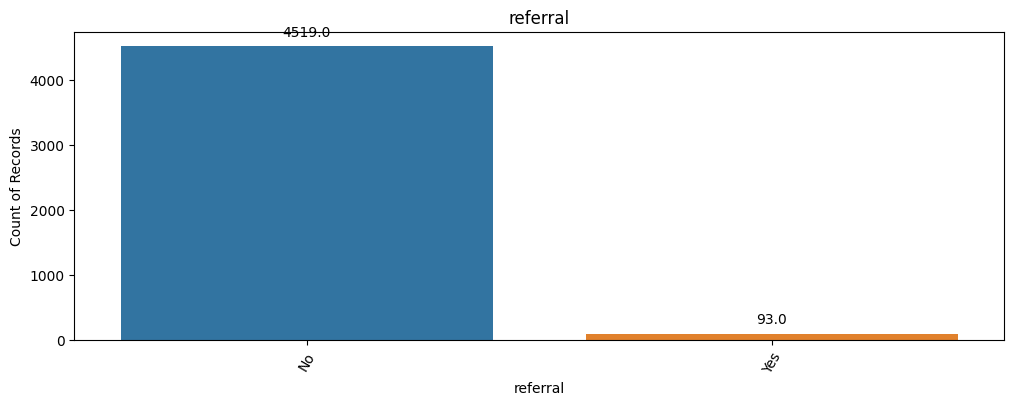

In [ ]:
# Visualize Distribution of Categorical Features

# Iterate over categorical and object columns in df
for i in df.select_dtypes(include=["object", "category"]).columns:
    plt.figure(figsize=(12, 4)) # Create a new figure for each plot

    # Create a countplot using seaborn
    sns.countplot(
        x=i,              # The column to plot on the x-axis
        data=df,     # The DataFrame containing the data
        hue=i             # Split the bars based on the categories within the column
    )

    # Annotate bar plots with count values
    for p in plt.gca().patches:  # Iterate through the patches (bars) in the plot
        height = p.get_height() # Get the height (count) of the bar

        # Add the count as text above the bar with the normalized values
        plt.gca().annotate(f'{height}',
                        (p.get_x() + p.get_width() / 2., height),  # Position the text above the center of the bar
                        ha='center', va='center',                   # Horizontal and vertical alignment
                        xytext=(0, 10), textcoords='offset points')  # Adjust text position slightly above the bar
    plt.title(i) # Add a title to the plot
    plt.xticks(rotation=60) # Rotate x-axis labels to improve readability
    plt.ylabel("Count of Records") # Set the y-axis label
    plt.show() # Display the plot

## Observations

1. Professionals dominate the lead pool (56.7%), followed by unemployed individuals (31.2%) and students (12%). ExtraaLearn could focus more on professionals since they represent a significant portion of the leads.
2. Leads interact almost equally via the **website (55%)** and **mobile app (45%)**, suggesting both channels seem to contribute almost equally, so resources should be allocated equally to optimize these channels.
3. High and Medium profile completion levels are prominent, indicating opportunities to convert more leads from Medium to High profile completion.
4. **Email activity** (49%) is the most frequent form of interaction, while phone (26.7%) and website (23.8%) activities also show notable engagement.
5. **Print media has minimal impact**, with less than 11% of leads engaging through traditional print platforms.
6. **Digital media** (11.4%) is a key driver for lead acquisition, highlighting the importance of digital marketing strategies.
7. **Educational channels** account for 15.3% of leads, suggesting that partnerships and visibility in these channels are valuable for reaching potential customers.



## Bivariate and Multivariate analysis

Leads will have different expectations from the outcome of the course and important categorical varibles such as: current occupation, first interaction, profile completed, and last activity, may play a key role in getting the leads to participate in the program. Let's find out how current occupation, first interaction, profile completed, and last activity affect lead status.

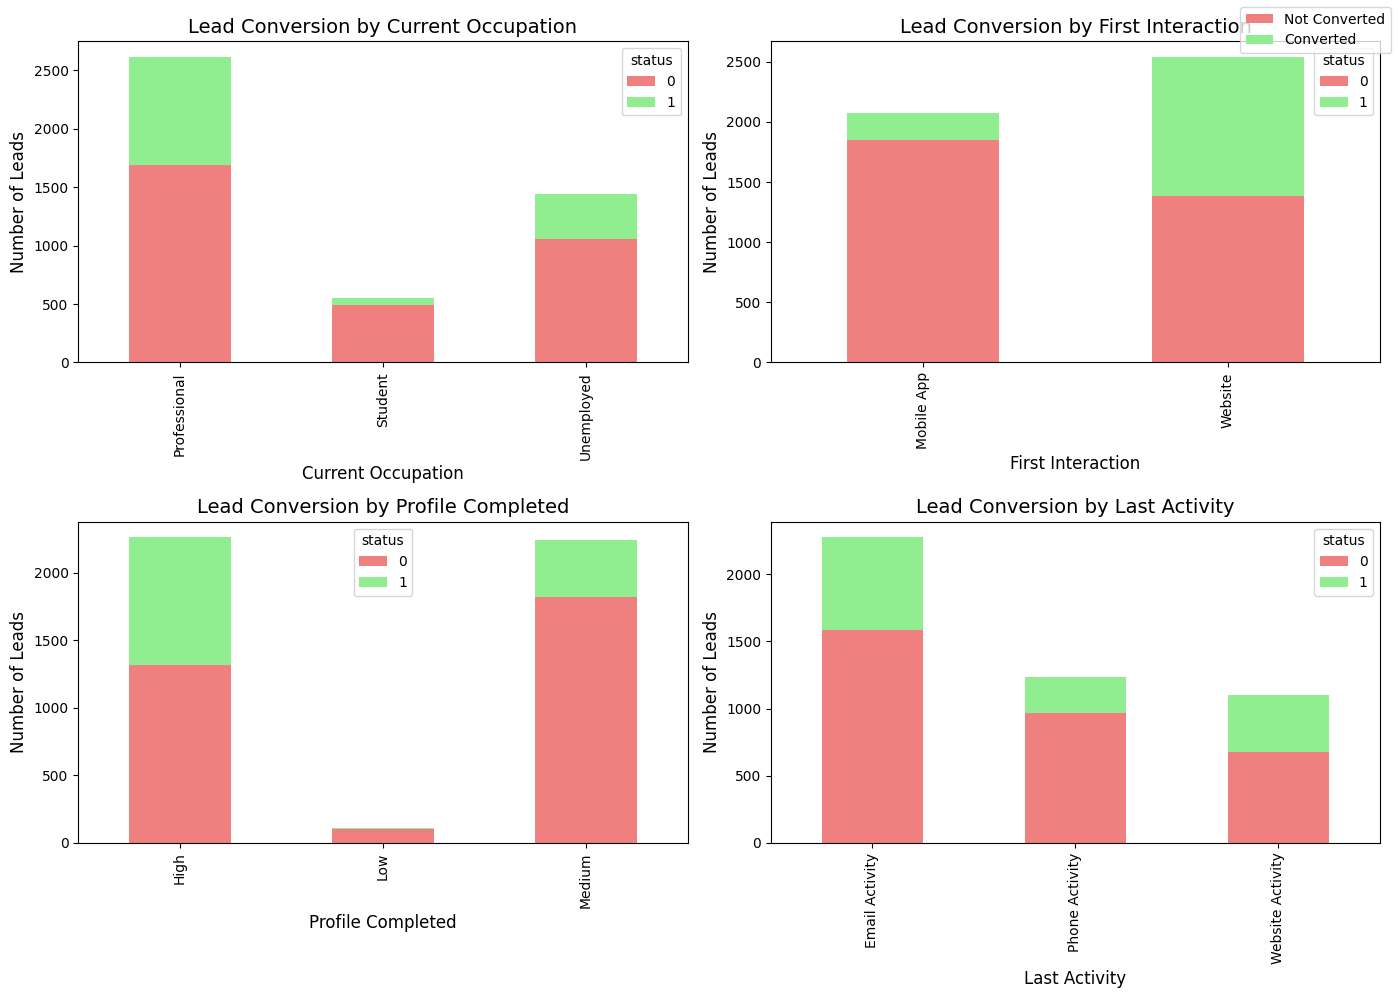

In [ ]:
# Lead conversion to customers by current occupation, first interaction, profile completed and last activity
# List of variables to analyze
variables = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity']

# Set up a figure and axes for subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # Creates a 2x2 grid for the plots, with a total figure size of 14x10
axes = axes.flatten()  # Flattens the axes array for easy indexing

# Iterate over the variables and create a stacked bar plot for each
for i, var in enumerate(variables):
    # Group by the variable and status to get counts
    group_data = df.groupby([var, 'status']).size().unstack()  # Groups data by the variable and lead status, counts occurrences

    # Plot stacked bar chart
    group_data.plot(kind='bar', stacked=True, ax=axes[i], color=['lightcoral', 'lightgreen'])  # Plots a stacked bar chart on the respective axis

    # Set the title and labels for each subplot
    axes[i].set_title(f'Lead Conversion by {var.replace("_", " ").title()}', fontsize=14)  # Sets title for each plot
    axes[i].set_xlabel(var.replace("_", " ").title(), fontsize=12)  # Sets x-axis label
    axes[i].set_ylabel('Number of Leads', fontsize=12)  # Sets y-axis label

# Adjust layout for better display
plt.tight_layout()  # Adjusts the layout to prevent overlaps between plots

# Add a legend to the figure
fig.legend(['Not Converted', 'Converted'], loc='upper right')  # Adds a legend to the figure indicating conversion status

# Show the plots
plt.show()  # Displays the plots



## Observations
1. **Current Occupation**:
   **900 professionals** converted to paid customers, making them the highest converting group. Professionals likely have higher disposable income and a stronger motivation for upskilling, which makes them more inclined to invest in ExtraaLearn’s programs compared to students or unemployed individuals.

2. **First Interaction**: Around **1,000 leads** who first interacted via the website converted, while fewer than **500 mobile app users** converted. Website users might have better access to more comprehensive information about the courses, increasing their trust and likelihood to convert. Mobile app users may encounter more limited features or prefer a more casual browsing experience.

3. **Profile Completion**:
   Over **1,000 leads** with **high profile completion** converted, whereas leads with low completion showed minimal conversions. A higher level of profile completion indicates a deeper level of engagement and interest from the lead, suggesting that they are more committed to learning about the program and are more likely to convert.

4. **Last Activity**:
   Leads with **email activity** as their last interaction saw the highest conversion rates, with an estimated **1,200 leads** converting. Email interactions often allow for detailed, personalized communication, which could help answer specific questions or concerns, thus increasing the chances of conversion compared to other methods like website or phone interactions which may feel less personal or detailed.

## Relationship between lead conversion status and the Numerical variables

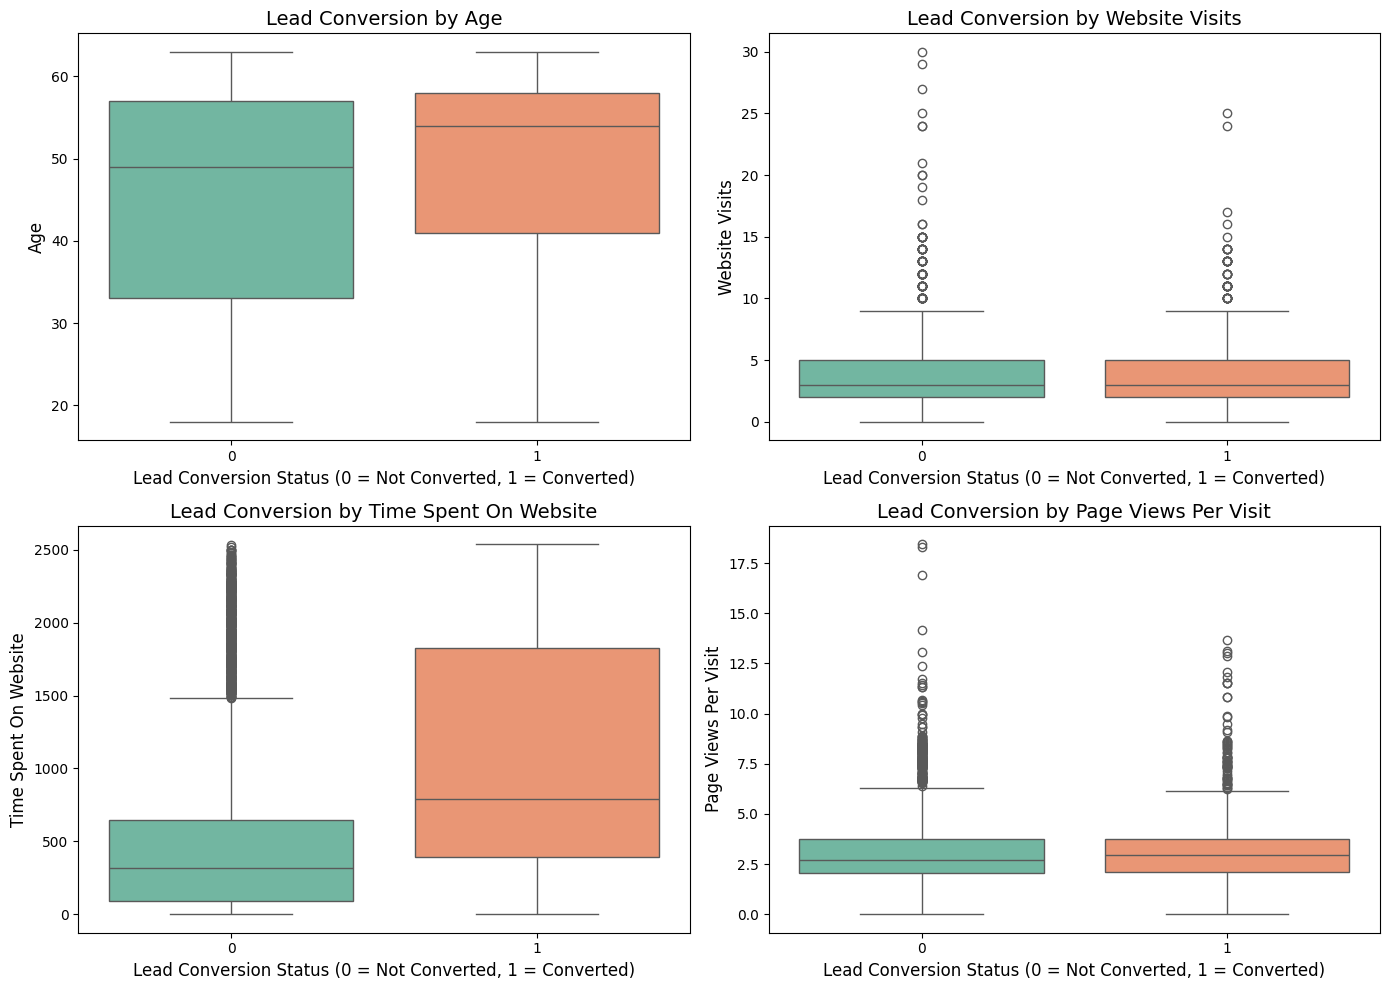

In [ ]:
# Relationship between lead conversion status and the variables
# List of numerical variables to analyze
numerical_vars = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']

# Set up figure and axes for subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid for four variables
axes = axes.flatten()

# Iterate over the numerical variables and create a boxplot for each
for i, var in enumerate(numerical_vars):
    sns.boxplot(data=df, x='status', y=var, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Lead Conversion by {var.replace("_", " ").title()}', fontsize=14)
    axes[i].set_xlabel('Lead Conversion Status (0 = Not Converted, 1 = Converted)', fontsize=12)
    axes[i].set_ylabel(var.replace("_", " ").title(), fontsize=12)

# Adjust layout for better display
plt.tight_layout()

# Show the plots
plt.show()


### Observations

1. **Age and Lead Conversion**:
  Converted leads are generally older, with a mean age of **52 years**, compared to **48 years** for non-converted leads. Older individuals likely have more motivation and financial capacity for career advancement, leading to a higher conversion rate.

2. **Website Visits and Lead Conversion**:
   Converted leads visit the website an average of **5 times**, while non-converted leads visit **3-4 times**. More visits indicate deeper engagement with the content, while too many visits without conversion might suggest indecision.

3. **Time Spent on Website and Lead Conversion**:
   Converted leads spend about **1,000 minutes** on the website, twice as much as non-converted leads at **500 minutes**. More time spent shows a higher level of interest and thorough research before purchase, while non-converted leads may lose interest or not find the information they need.

4. **Page Views per Visit and Lead Conversion**:
   Converted leads view **4-5 pages** per visit on average, compared to **2-3 pages** for non-converted leads. More page views suggest a deeper exploration of the course offerings, which helps build confidence in making a purchase decision.

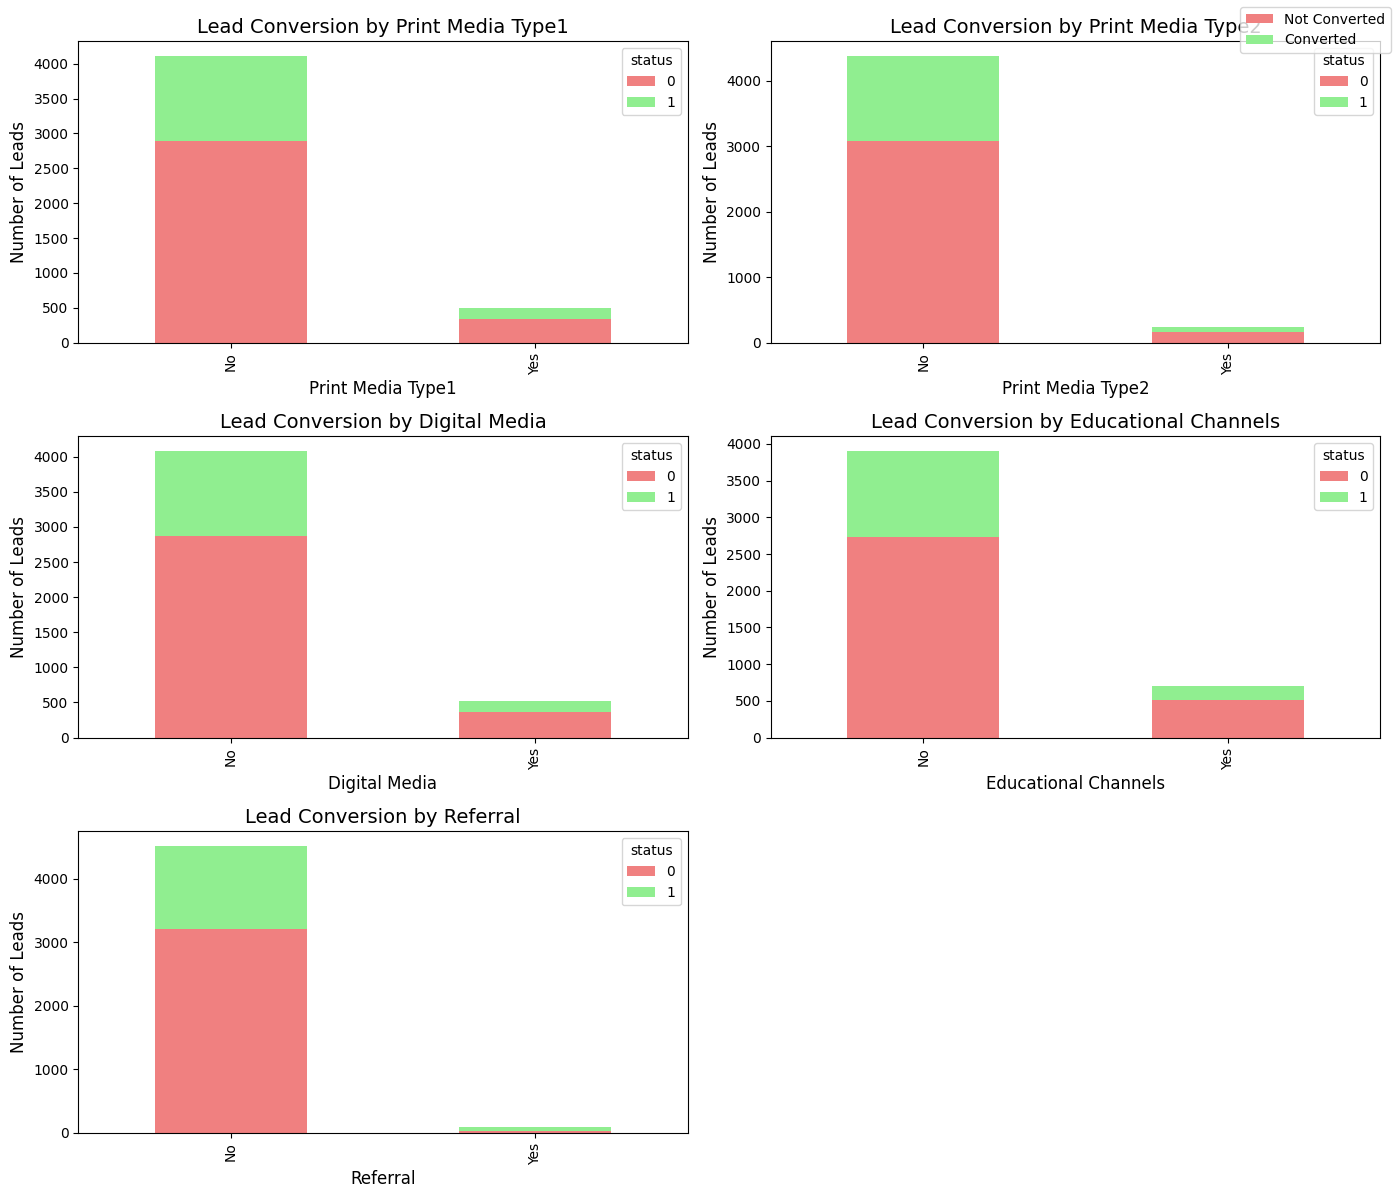

In [ ]:

# List of media_variable to analyze alongside referrals
media_vars = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']

# Set up figure and axes for subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 12))  # 3x2 grid for five variables
axes = axes.flatten()

# Iterate over the media variables and create a stacked bar plot for each
for i, var in enumerate(media_vars):
    # Group by the variable and status to get counts
    group_data = df.groupby([var, 'status']).size().unstack()

    # Plot stacked bar chart with custom colors
    group_data.plot(kind='bar', stacked=True, ax=axes[i], color=['lightcoral', 'lightgreen'])

    # Set the title and labels for each subplot
    axes[i].set_title(f'Lead Conversion by {var.replace("_", " ").title()}', fontsize=14)
    axes[i].set_xlabel(var.replace("_", " ").title(), fontsize=12)
    axes[i].set_ylabel('Number of Leads', fontsize=12)

# Remove the last empty subplot (since there are 5 variables but 6 subplots)
fig.delaxes(axes[-1])

# Adjust layout for better display
plt.tight_layout()

# Add a legend to the figure
fig.legend(['Not Converted', 'Converted'], loc='upper right')

# Show the plots
plt.show()



### Observations:

1. **Print Media**:
   Few leads interacted with print ads, and conversion rates were low. Print media is less effective in driving conversions compared to other channels.
2. **Digital Media**:
   Most leads converted without interacting with digital ads. Digital ads are not a major driver of conversions; leads convert through other channels.
3. **Educational Channels**:
   Conversion is higher among those who did not interact with educational channels. Leads from educational channels may already know of similar programs or be less motivated to convert.
4. **Referrals**:
   Few leads came through referrals, and conversion rates are similar to non-referral leads. Referrals are not a significant factor in conversions, possibly due to limited peer recommendations or low referral incentives.

*  print media, digital media, educational channels, and referrals have a limited impact on lead conversion for ExtraaLearn. Most conversions occur among leads who did not interact with these media channels. This suggests that the company's lead conversions are primarily driven by other channels or factors such as direct engagement (e.g., website visits) or organic search, rather than through paid or referral-based media exposure.




## Relationship between different numerical variables

<Axes: >

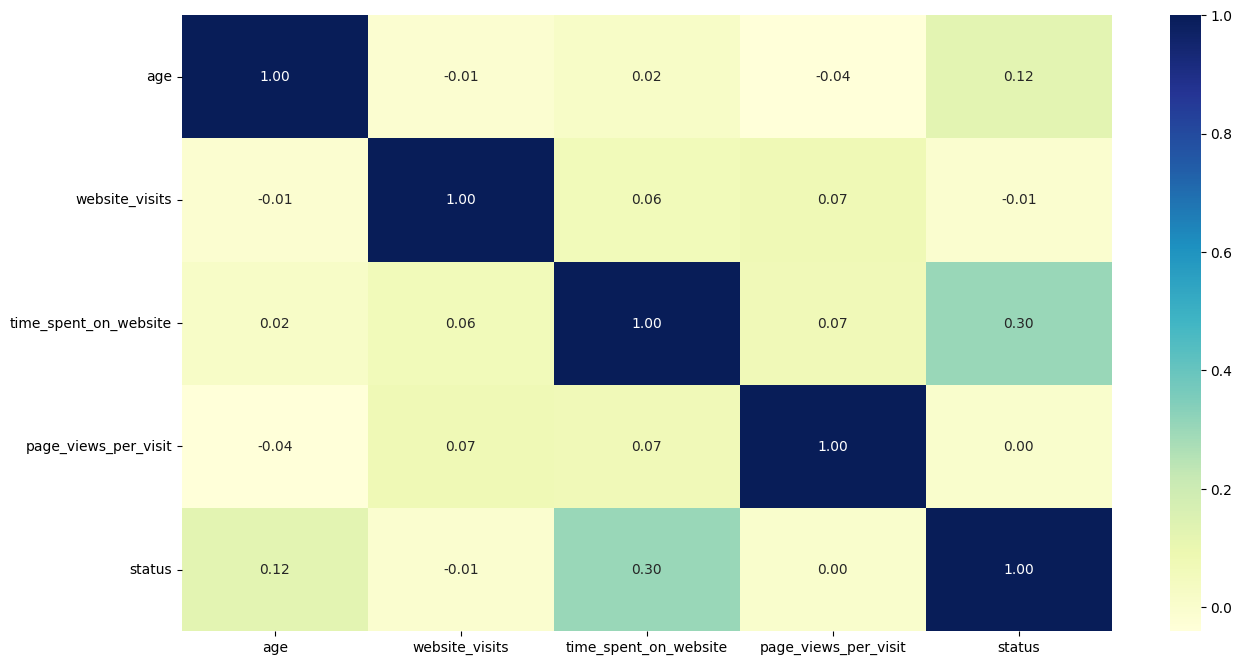

In [ ]:
 # Setting the figure size for the heatmap
plt.figure(figsize=(15, 8))

# Create and display a correlation heatmap of numerical features
sns.heatmap(
    df[num_cols].corr(),   # Calculate the correlation matrix for the selected numerical columns
    annot=True,             # Display correlation values within the heatmap cells
    fmt='.2f',             # Format the correlation values to 2 decimal places
    cmap='YlGnBu')         # Use the 'YlGnBu' colormap for visualization (yellow-green-blue)


### Observations:

1. **Time spent on the website** has the strongest positive correlation (**0.30**) with lead conversion, indicating that longer engagement increases conversion likelihood.
2. **Age** shows a weak positive correlation (**0.12**) with conversion, suggesting older leads may be slightly more likely to convert.
3. **Page views per visit** and **website visits** have minimal correlation with conversion, indicating they do not significantly influence the likelihood of a lead converting.

## **Data preparation**


Creating dummy variables for categorical Variables

In [ ]:
# Creating list of dummy columns
to_get_dummies_for = ['current_occupation','first_interaction', 'profile_completed','last_activity',
            'print_media_type1', 'print_media_type2','digital_media', 'educational_channels', 'referral']

# Generate dummy variables (one-hot encoding) for the specified categorical columns.
# - Each unique category within a column becomes a new column with binary values (0 or 1).
# - `drop_first=True`: Drops the first dummy variable for each categorical column to avoid multicollinearity.
# - `dtype=int`: Explicitly sets the data type of the new dummy columns to integers.
df = pd.get_dummies(data=df, columns=to_get_dummies_for, drop_first=True, dtype=int)

### Separating the independent variables (X) and the dependent variable (Y)

In [ ]:
# Separating target variable and other variables
Y= df.status
X= df.drop(columns = ['status'])

### Splitting the data into 70% train and 30% test set

In [ ]:
# Divide the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(

    X, Y,  # Define the feature matrix (X) and target variable (Y) to be split

    # Specify the percentage of data allocated to the test set
    test_size=0.3,  # 30% of the data is assigned for testing, while 70% is for training
    random_state=1,  # Set a fixed seed to ensure the split is the same every time for reproducibility
    stratify=Y)  # Ensure the target variable (Y) maintains the same class distribution in both train and test sets


In [ ]:
X_train.sample(5)

,age,website_visits,time_spent_on_website,page_views_per_visit,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
3945,56,3,604,2.01300,0,0,1,0,0,1,0,0,0,0,0,0
4408,22,4,173,5.54300,1,0,1,0,1,0,0,0,0,0,0,0
2971,59,2,1079,4.24000,0,0,0,0,1,0,0,0,0,0,1,0
2242,56,3,1930,3.68600,0,0,0,0,0,0,1,0,0,0,1,0
920,23,2,42,1.95300,1,0,0,0,1,1,0,0,0,0,0,0


In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3228, 16)
Shape of test set :  (1384, 16)
Percentage of classes in training set:
status
0   0.70136
1   0.29864
Name: proportion, dtype: float64
Percentage of classes in test set:
status
0   0.70159
1   0.29841
Name: proportion, dtype: float64



### <font color="lightgreen"> **Building Classification Models**</font>
**Model Evaluation Criteria:**
A model can make incorrect predictions in two ways:
1. Predicting that a lead won't convert to a paid customer, when in reality, the lead would have converted.
2. Predicting that a lead will convert to a paid customer, when in fact, the lead won't convert.

**Which mistake matters more?**
- If the model incorrectly predicts that a lead won’t convert, but the lead actually would have, the company risks losing a potential customer.
- If the model predicts that a lead will convert, but the lead doesn’t, the company could waste resources nurturing a false positive.

Losing a potential customer is a more significant loss for the company.

**How can we minimize these losses?**
- The company should aim to maximize **Recall**, which reduces the chances of False Negatives (missing potential customers). A higher Recall score improves the likelihood of capturing leads that will convert.
  
To simplify model evaluation, we'll create functions for calculating various metrics and the confusion matrix, so we can reuse the same code across models:
- **model_performance_classification_statsmodels**: A function for checking model performance.
- **confusion_matrix_statsmodels**: A function for plotting the confusion matrix.

In [ ]:
# Function to assess the model's performance using classification metrics
def metrics_score(actual, predicted):
    # --- Classification Report ---
    # Output a detailed classification report comparing actual values (true labels)
    # with predicted values from the model
    # The report includes metrics like precision, recall, and F1-score for each class along with overall performance
    print(classification_report(actual, predicted))

    # --- Confusion Matrix ---
    cm = confusion_matrix(actual, predicted)  # Calculate the confusion matrix to show different types of prediction errors
    plt.figure(figsize=(8, 5))  # Create a new plot with dimensions of 8 by 5 inches

    # Visualize the confusion matrix using a seaborn heatmap
    sns.heatmap(
        cm, annot=True,                # Display the numeric values in the heatmap cells
        fmt='.2f',                     # Format numbers to two decimal places
        xticklabels=['Not Converted', 'Converted'],  # Set custom labels for the x-axis
        yticklabels=['Not Converted', 'Converted'])  # Set custom labels for the y-axis

    plt.ylabel('Actual')  # Label the y-axis as 'Actual'
    plt.xlabel('Predicted')  # Label the x-axis as 'Predicted'
    plt.show()  # Display the heatmap with the confusion matrix


### **Decision Tree Model**
We will use the **DecisionTreeClassifier** function to build our model. We can use the class_weight hyperparameter and provide a dictionary {1: 0.17, 0: 0.83} to specify the weights for each class.



In [ ]:
# --- Model Building: Decision Tree Classifier ---

# Initialize a DecisionTreeClassifier with class weights and a random seed
dt = DecisionTreeClassifier(
    class_weight={1: 0.17, 0: 0.83},  # Adjust class weights to account for class imbalance
    random_state=1)                    # Set a random seed for reproducibility


In [ ]:
# Fitting decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.83, 1: 0.17}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



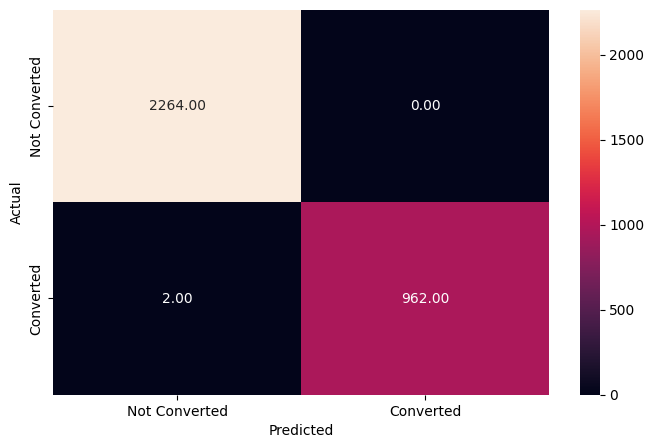

In [ ]:
# --- Model Evaluation: Decision Tree on Training Set ---

# Predict classes for the training data using the trained decision tree model
y_train_pred_dt = dt.predict(X_train)

# Evaluate model performance on the training set
metrics_score(y_train, y_train_pred_dt)



### Model performance results on decision tree training set
1. **Accuracy**: 100% (Perfect predictions on the training data).
2.  **Precision, Recall, F1-Score**: All are 1.00 for both converted and not converted classes.
3. **Confusion Matrix**:

* 2264 true negatives (Not Converted correctly predicted).
*  962 true positives (Converted correctly predicted).
*  2 false negatives (Converted leads predicted as Not Converted).
*  0 false positives.

The model performs perfectly on the training data, which suggests it may be **overfitting** and might not generalize as well to new or unseen data. Testing on a validation or test set is crucial to ensure this performance is reliable.

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       971
           1       0.67      0.67      0.67       413

    accuracy                           0.80      1384
   macro avg       0.76      0.76      0.76      1384
weighted avg       0.80      0.80      0.80      1384



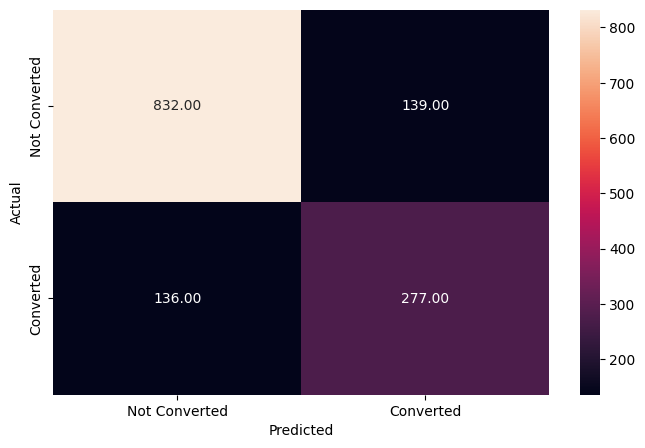

In [ ]:
# --- Model Evaluation: Decision Tree on Test Set ---

# Predict classes for the test data using the trained decision tree model
y_test_pred_dt = dt.predict(X_test)

# Evaluate model performance on the test set
metrics_score(y_test, y_test_pred_dt)


### Model performance on test data results:
1. **Accuracy**: 80% (Good, but not perfect).
2. **Precision**:
*  Not Converted (0): 0.86
*  Converted (1): 0.67
3. **Recall**:
*  Not Converted (0): 0.86
*  Converted (1): 0.67
4. **F1-Score**:
*  Not Converted (0): 0.86
*  Converted (1): 0.67

5. **Confusion Matrix**:
* 832 true negatives (Not Converted predicted correctly).
* 277 true positives (Converted predicted correctly).
* 139 false positives (Not Converted predicted as Converted).
* 136 false negatives (Converted predicted as Not Converted).

The model performs reasonably well on the test data with an accuracy of 80%. However, there is some misclassification, especially for the **Converted leads**, as shown by the lower precision and recall (both 0.67). This indicates that the model might be better at predicting leads that won't convert, but less effective at identifying potential customers who will convert. Further tuning or feature improvements might be needed to enhance performance, especially for predicting conversions.

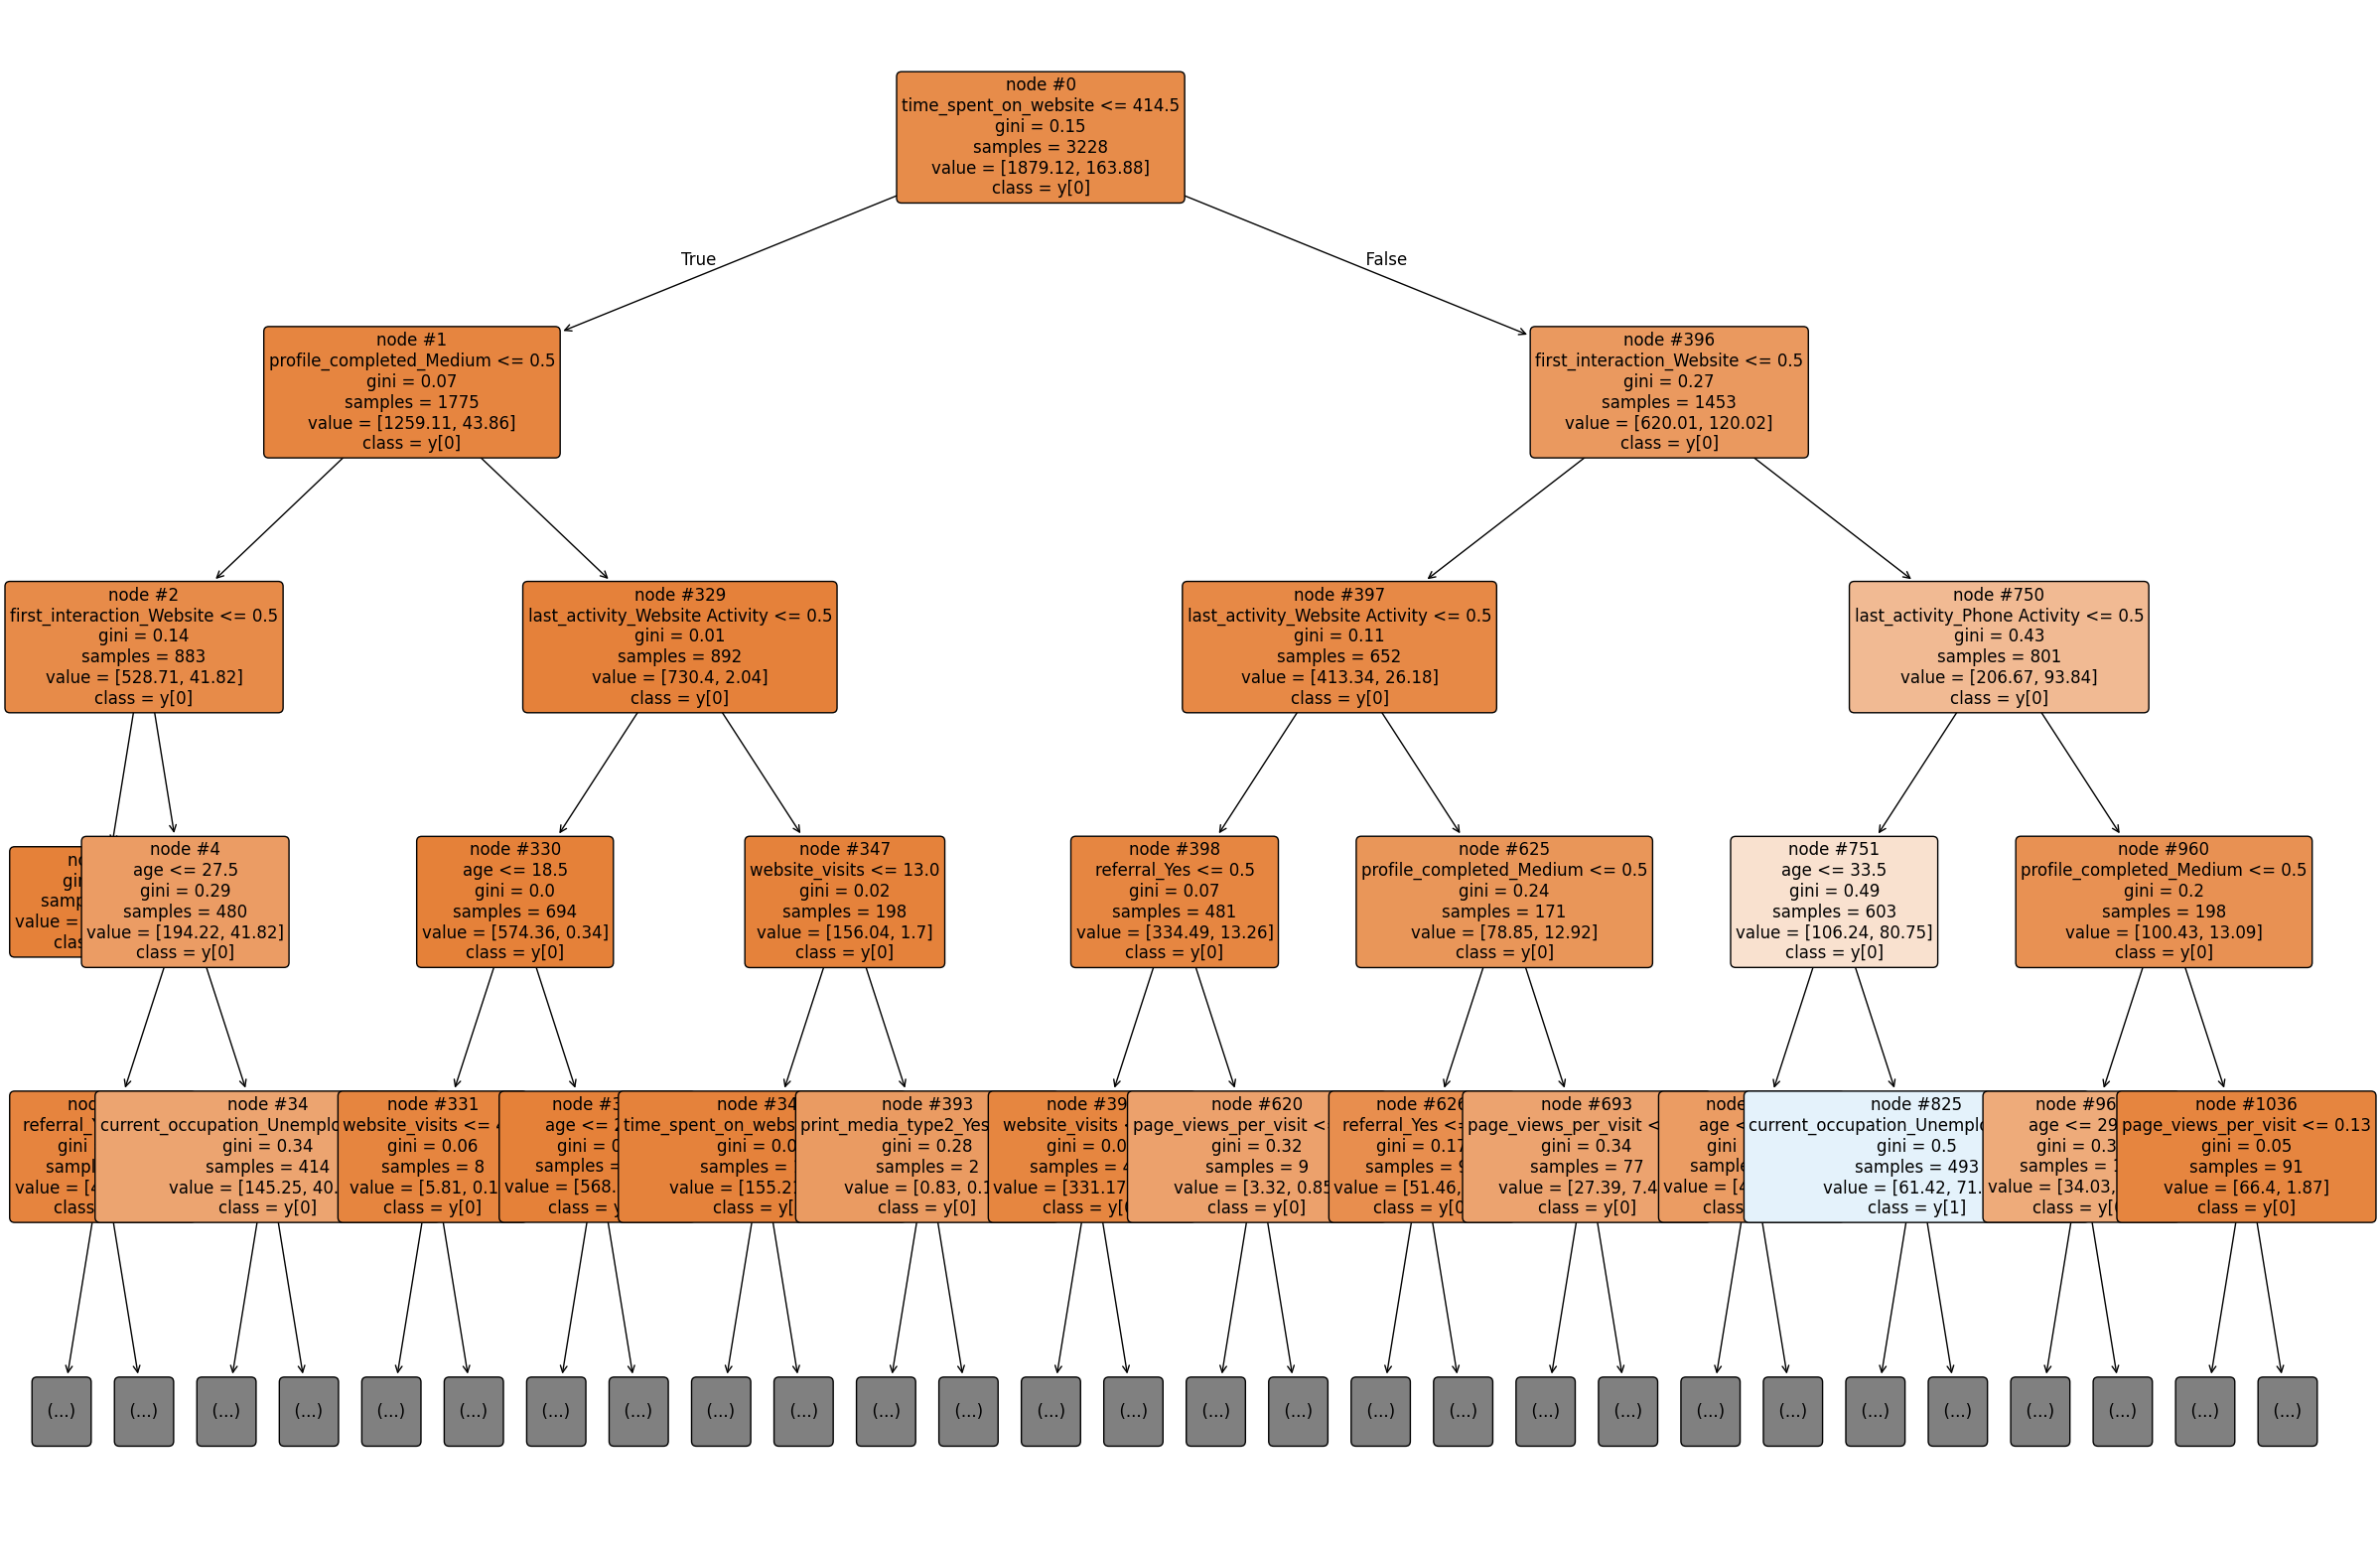

In [ ]:
# Trained decision tree model
features = list(X.columns) # List of feature names for labeling nodes (assuming X is your feature matrix)
plt.figure(figsize=(30, 20)) # Create a figure for the decision tree plot with larger dimensions

# Plot the decision tree with improved readability
tree.plot_tree(
    dt,                         # The trained decision tree model
    max_depth=4,                 # Limit the tree depth for better visualization (adjust as needed)
    feature_names=features,     # Use actual feature names to label nodes
    filled=True,               # Fill nodes with colors to indicate class proportions
    fontsize=12,               # Font size for text within the tree nodes
    node_ids=True,              # Display node IDs for reference
    class_names=True,           # Display class names instead of numerical values (e.g., 'Attrite', 'Not Attrite')
    rounded=True,              # Round the corners of the nodes for a cleaner look
    precision=2)                # Display impurity values to 2 decimal places (e.g., Gini impurity)

plt.show() # Display the tree plot

### Note:
- **Dark Orange**: Represents a strong bias towards **class 0 (Not Converted)**.
- **Lighter Orange**: Represents nodes where there is a mix of predictions for both classes, but with a bias towards **class 0**.
- **Light Blue**: Represents a bias towards **class 1 (Converted)**.

### Key Observations:
1. The root node splits on **time spent on the website** as the most important factor for predicting conversions.
2. Features like **profile completion** and **first interaction type** (Website or Mobile App) are key in further differentiating between leads.
3. The model shows a general tendency to predict **Not Converted** (class 0), as seen by the dominance of orange-colored nodes.
4. **Gini values** are low, indicating high confidence in predictions within certain nodes.
5. The tree has been capped at a **maximum depth of 4**, making the decision-making process interpretable without overcomplicating the model.
6. Suffer from overfitting.

### Let's perform hyperparameter tuning with **GridSearchCV** to identify the optimal max_depth and help reduce overfitting in the model.



### Decision Tree - Hyperparameter Tuning
We will apply the **class_weight** parameter with values {0: 0.17, 1: 0.83}, which roughly counteracts the class imbalance in the original dataset.

This adjustment will prioritize class **1** as the more important class for the model.

In [ ]:
# Choose the type of classifier (Decision Tree) and set class weights to handle class imbalance
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

# Define a grid of hyperparameters to tune, including max_depth, criterion, and min_samples_leaf
parameters = {'max_depth': np.arange(2, 7),   # Varying the max_depth from 2 to 6
              'criterion': ['gini', 'entropy'],  # Testing both 'gini' and 'entropy' splitting criteria
              'min_samples_leaf': [5, 10, 20, 25]  # Trying different minimum samples required to be a leaf node
             }

# Define the scoring metric as 'recall' for class 1 to focus on minimizing false negatives
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Initialize GridSearchCV to search for the best hyperparameter combinations using 10-fold cross-validation
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

# Fit the grid search model using the training data to find the best parameter combinations
gridCV = gridCV.fit(X_train, y_train)

# Set the decision tree model to the best combination of hyperparameters found by GridSearchCV
dtree_estimator = gridCV.best_estimator_

# Fit the decision tree model with the best parameters to the training data
dtree_estimator.fit(X_train, y_train)


DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, max_depth=2,
                       min_samples_leaf=5, random_state=1)

              precision    recall  f1-score   support

           0       1.00      0.36      0.53      2264
           1       0.40      1.00      0.57       964

    accuracy                           0.55      3228
   macro avg       0.70      0.68      0.55      3228
weighted avg       0.82      0.55      0.54      3228



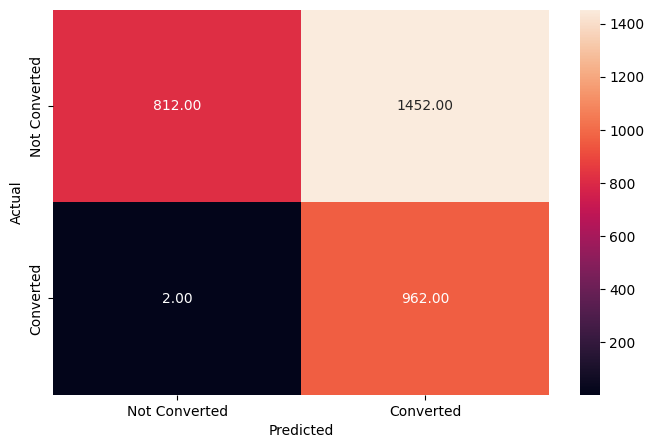

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = dtree_estimator.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

**Observation:**

Compared to the model with the default hyperparameters, **the performance on the training set has decreased significantly.** This is expected since the goal is to reduce overfitting. The model has reduced overfitting by focusing on maximizing recall for converted leads which is what we want.

              precision    recall  f1-score   support

           0       0.99      0.34      0.50       971
           1       0.39      0.99      0.56       413

    accuracy                           0.53      1384
   macro avg       0.69      0.66      0.53      1384
weighted avg       0.81      0.53      0.52      1384



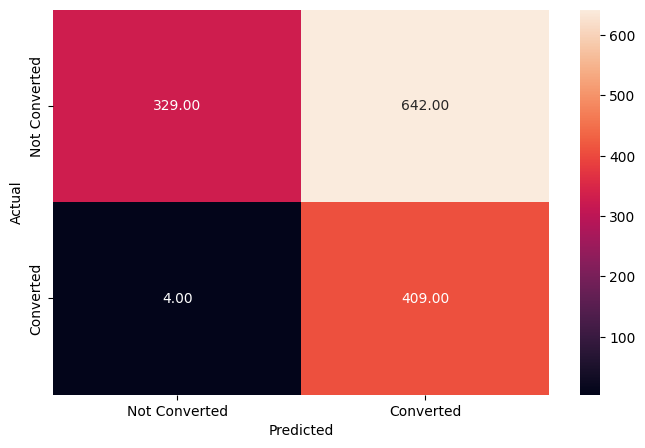

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = dtree_estimator.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

## **Observations**
* The tuned model is not performing well in comparison to the model with default values of hyperparameters as **Accuracy** is still **53%** in both models.
*  **Recall for Converted Leads** improved to **0.99** as compared to **0.67** in the original model, meaning nearly all conversions are detected.
* **False Positives** have significantly increased, with many Not Converted leads being misclassified as Converted.
* The model prioritizes capturing converted leads (high recall) at the cost of precision, resulting in many incorrect predictions of conversion, which may lead to wasted resources on false positives. This might cost time and effor to EXtraalearn.


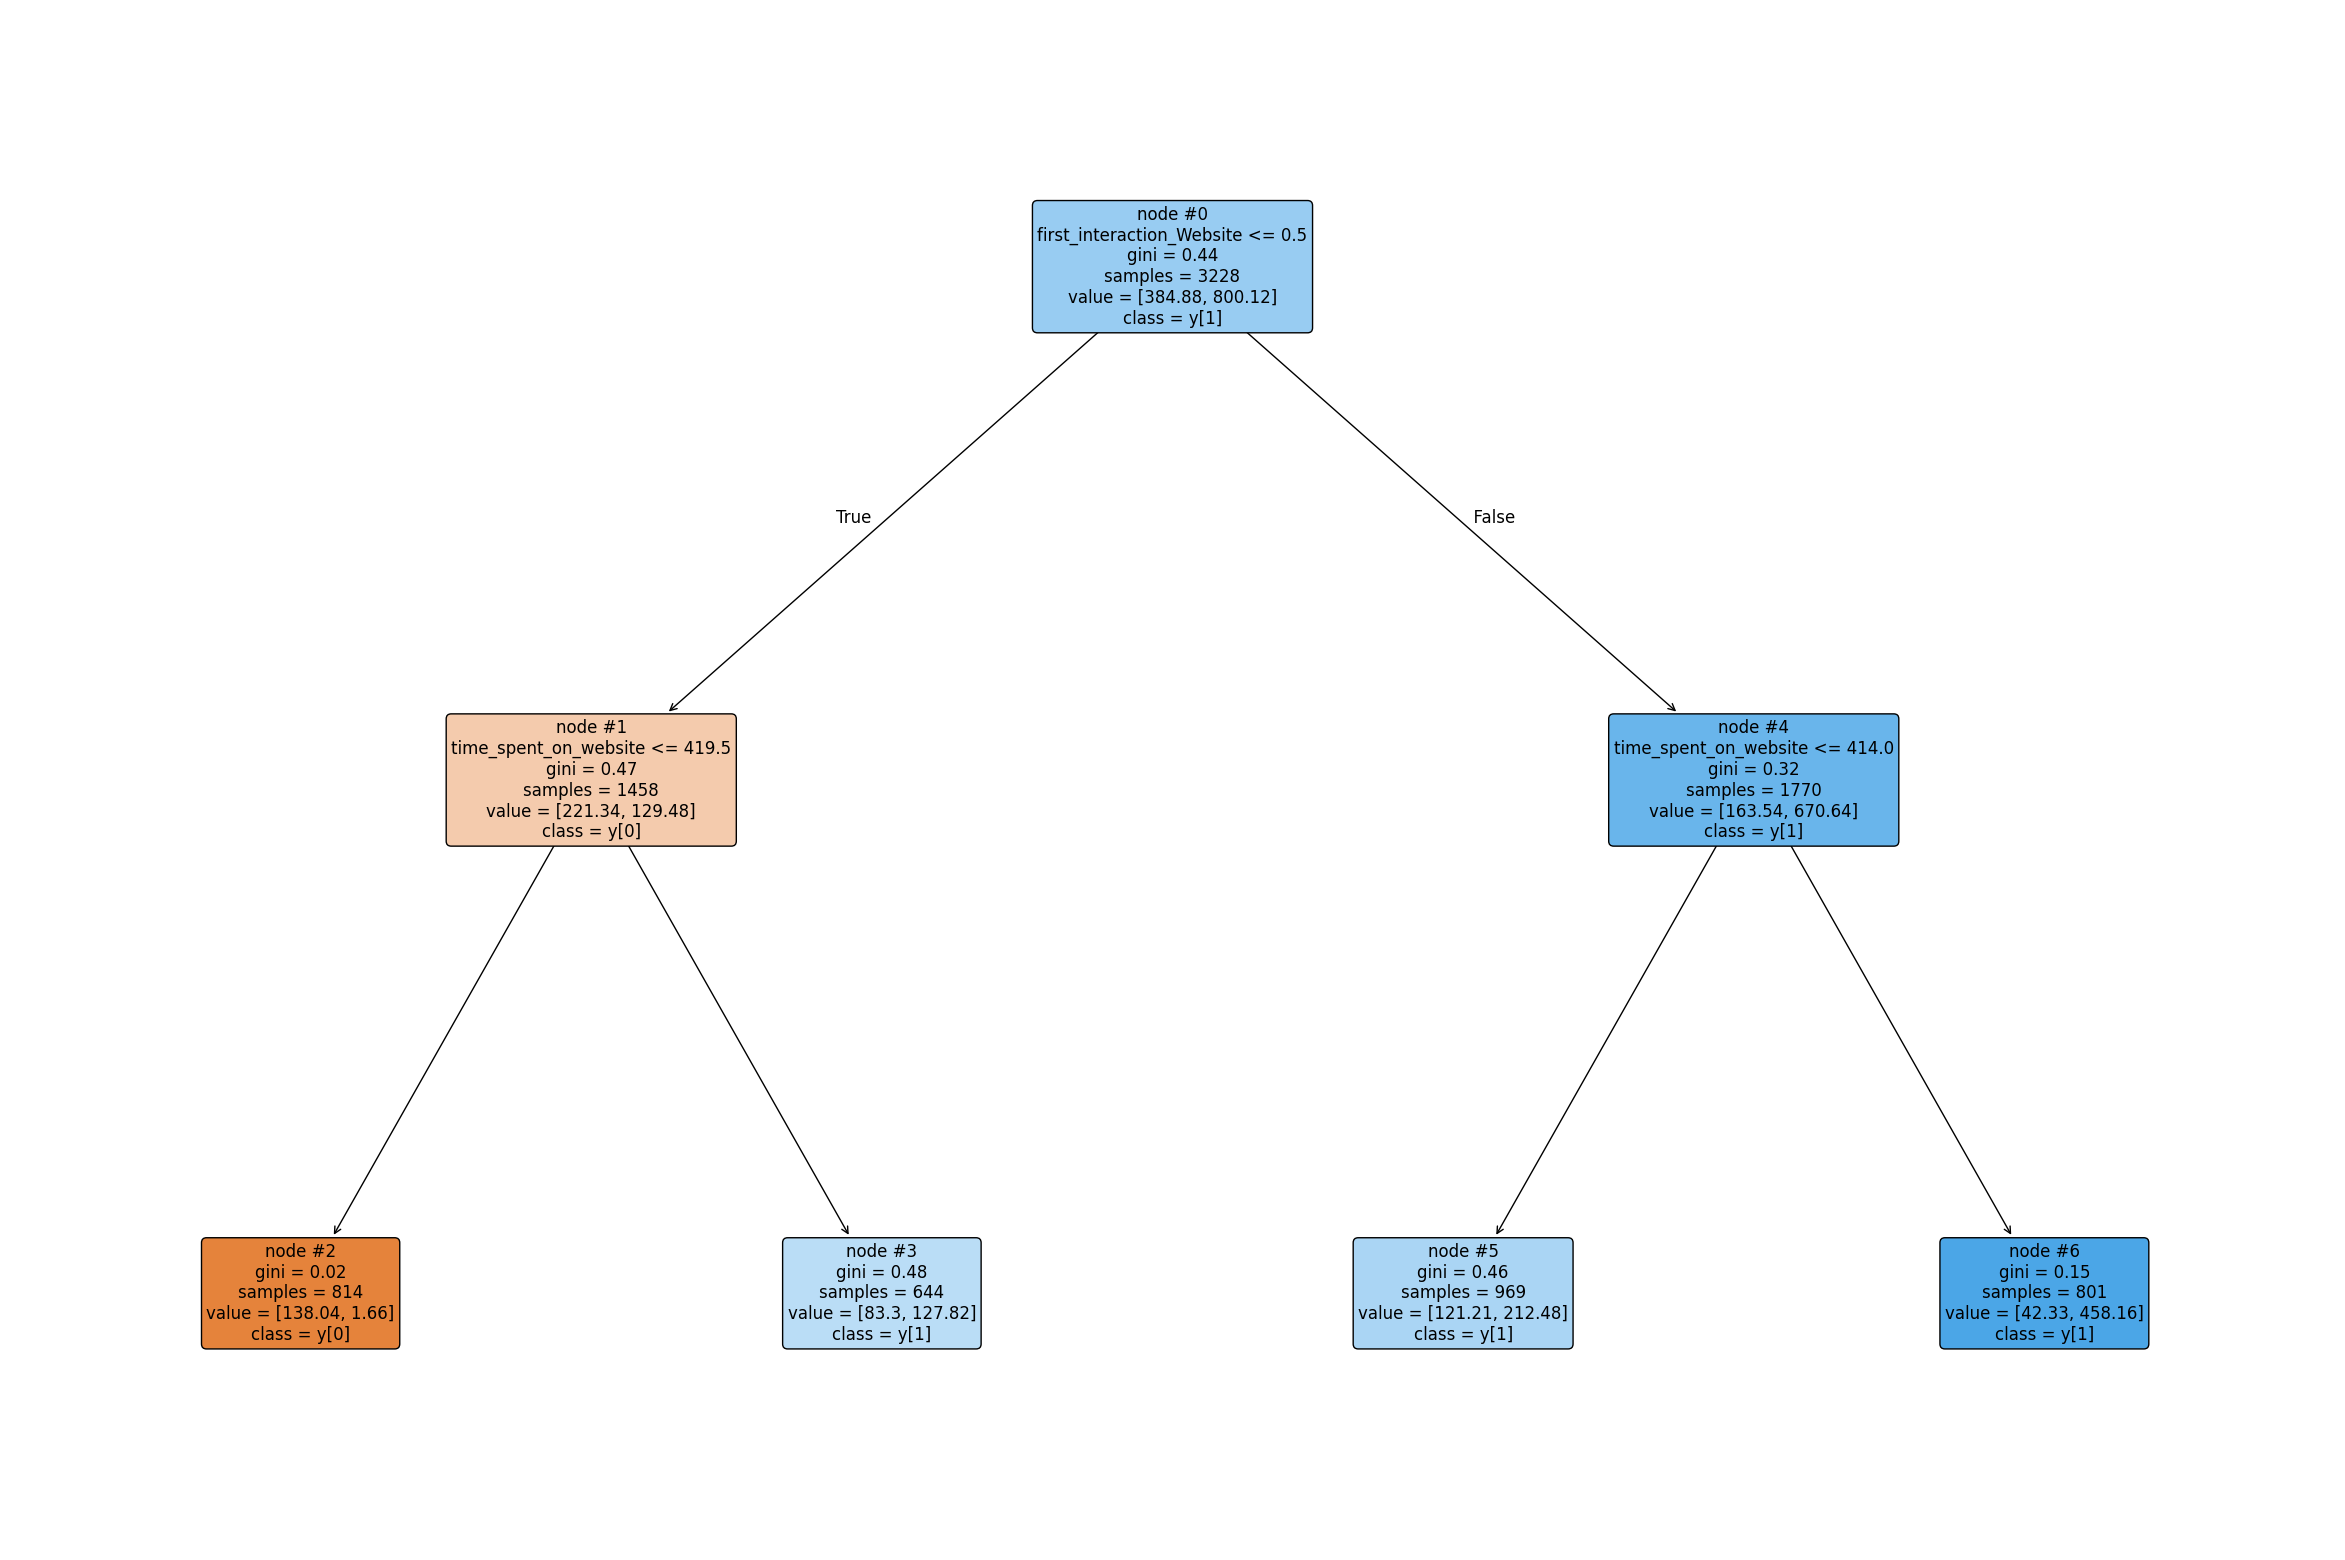

In [ ]:
# --- Hypertuning parameter_Decision Tree Visualization ---

features = list(X.columns)  # Generate a list of feature names to label the nodes (assuming X is your feature matrix)
plt.figure(figsize=(30, 20))  # Create a larger figure to display the decision tree clearly

# Visualize the decision tree with enhanced readability
tree.plot_tree(
    dtree_estimator,                         # The tuned decision tree model
    max_depth=4,                 # Limit the tree depth for easier visualization (adjust as necessary)
    feature_names=features,      # Label the nodes with the actual feature names
    filled=True,                 # Fill the nodes with colors to reflect class proportions
    fontsize=12,                 # Set the font size for text within the tree nodes
    node_ids=True,               # Show node IDs for reference
    class_names=True,            # Display class names instead of numbers (e.g., 'Converted', 'Not Converted')
    rounded=True,                # Round the corners of nodes for a neater appearance
    precision=2)                 # Display impurity values with two decimal places (e.g., Gini impurity)

plt.show()  # display the decision tree plot


### Note:
* **Dark Orange**: Represents a strong prediction towards **class 0 (Not Converted)**. That is y[0]
* **Light Blue**: Represents a strong prediction towards **class 1 (Converted)**. That is y[1]
* **Lighter Orange/Blue**: Indicates mixed predictions with a slight bias towards the respective class.
* Also, the more the number of observations in a leaf, the darker its color gets.

### Key Observations:
1. The root node splits on **first interaction via Website**, with leads interacting through the website being classified towards **class 1 (Converted)**.
2. **Time spent on the website** appears again as a key factor in further splitting, indicating its importance in predicting both classes.
3. Class **1 (Converted)** nodes are strongly represented by **blue nodes**, showing that leads spending more time on the website tend to convert.
4. **Gini values** are relatively low across important nodes, showing that the model is making fairly confident predictions in these cases.
5. The model places more importance on website interactions and time spent on the website when making predictions about lead conversions.
6. Shifts focus towards first interaction type and balances predictions towards conversions, making it more generalized and potentially better at handling class imbalance when comapred to the default hyperparameter model. It also addresses overfitting. The simpler structure could also enhance performance on unseen data.

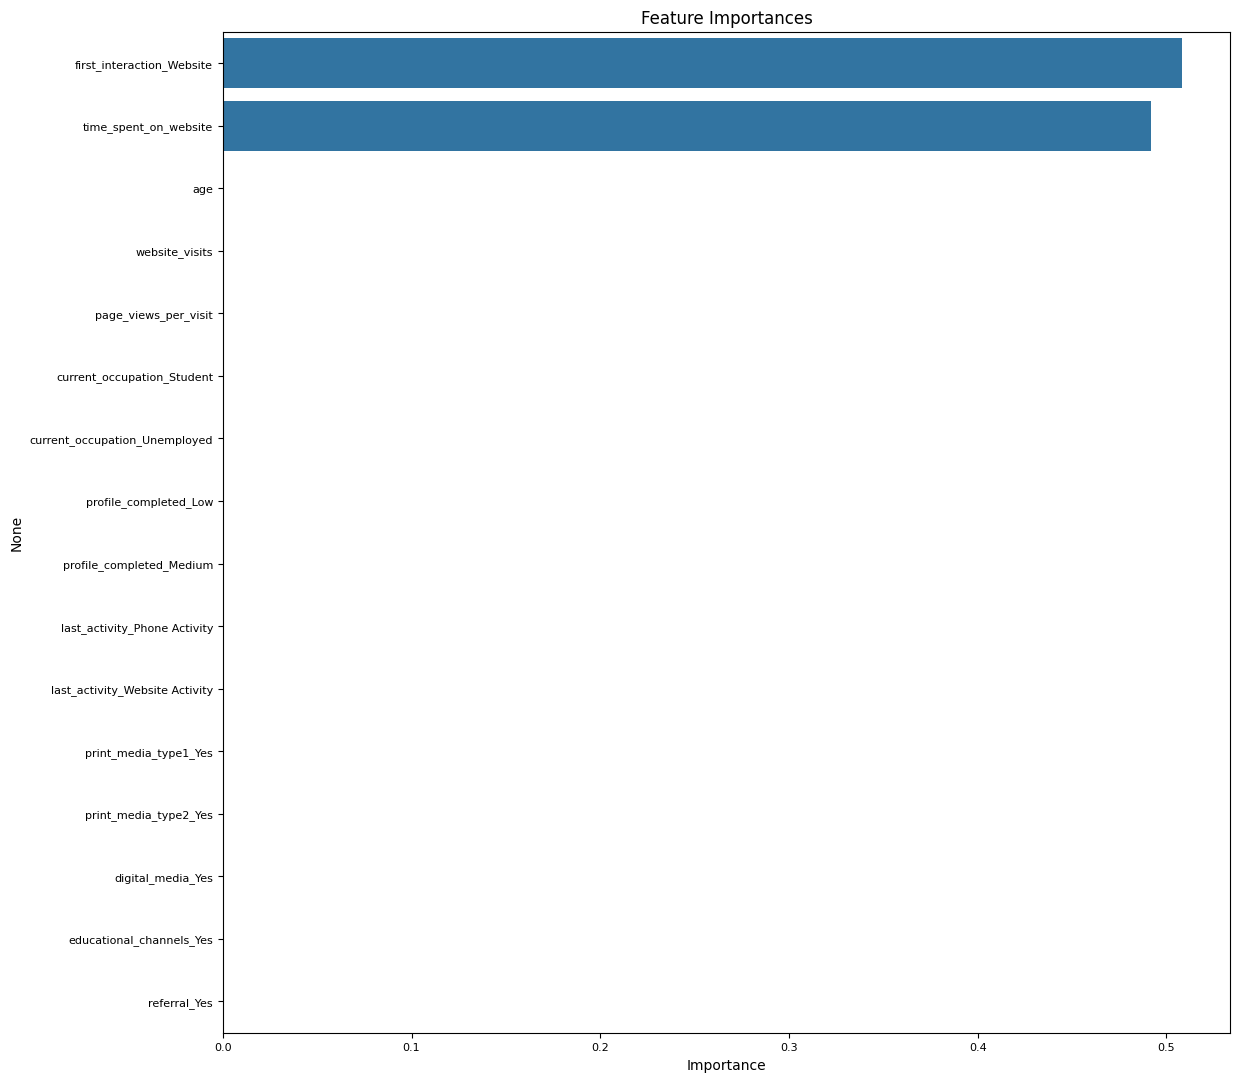

In [ ]:
# --- Feature Importance Analysis: Tuned Decision Tree ---
importances = dtree_estimator.feature_importances_ # Extract feature importances from the tuned decision tree model

columns = X.columns  # Obtain the names of the columns from the feature matrix (X)
importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
# Visualize the feature importances using a bar plot
plt.figure(figsize=(13, 13))  # Create a plot with the given dimensions

# Create a bar plot using seaborn to display feature importance:
#  The x-axis shows the importance values.
#  The y-axis shows the corresponding feature names.
sns.barplot(
    data=importance_df,          # Input the DataFrame containing feature importances
    x=importance_df.Importance,  # Plot the 'Importance' values on the x-axis
    y=importance_df.index)       # Display the feature names (index) on the y-axis
plt.title('Feature Importances')  # Add a title to the plot
plt.xlabel('Importance')          # Label the x-axis as 'Importance'
plt.xticks(fontsize=8)            # Adjust font size of the x-axis labels
plt.yticks(fontsize=8)            # Adjust font size of the y-axis labels
plt.show()  # show the plot


### Key Observations from the Feature Importance Analysis:

1. **First Interaction (Website)** is the most important feature, indicating that how a lead first engages with ExtraaLearn has a significant influence on the likelihood of conversion.
   
2. **Time Spent on the Website** is also highly influential, showing that the more time a lead spends on the website, the higher the chance they might convert.

3. Other features like **age**, **website visits**, and **page views per visit** have minimal influence, suggesting they are less important in predicting conversions.

4. The rest of the variables have no impact in this model, while deciding whether a lead will be converted or not.

## **Random Forest**
Random Forest is a bagging algorithm where the base models are Decision Trees. Samples are taken from the training data and on each sample, a decision tree makes a prediction.

In [ ]:
# --- Model Training: Random Forest Classifier ---

# Initialize the Random Forest classifier with specified hyperparameters
rf_estimator = RandomForestClassifier(
    class_weight={1: 0.17, 0: 0.83},  # Assign weights to classes to handle class imbalance
    random_state=1                    # Set random seed for reproducibility
)

# Train the Random Forest classifier on the training data
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.83, 1: 0.17}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



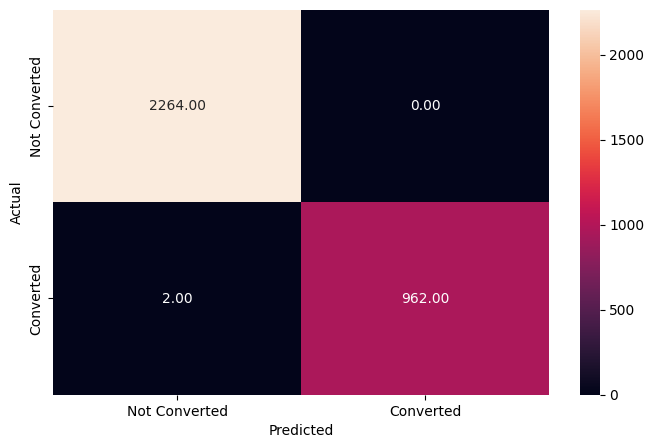

In [ ]:
# --- Model Evaluation: Random Forest on Training Set ---

# Predict classes for the training data using the trained Random Forest model
y_pred_train_rf = rf_estimator.predict(X_train)

# Evaluate the model's performance on the training set
metrics_score(y_train, y_pred_train_rf)

Observation:

For all the metrics in the training dataset, the Random Forest gives a 100% score.

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       971
           1       0.78      0.74      0.76       413

    accuracy                           0.86      1384
   macro avg       0.83      0.83      0.83      1384
weighted avg       0.86      0.86      0.86      1384



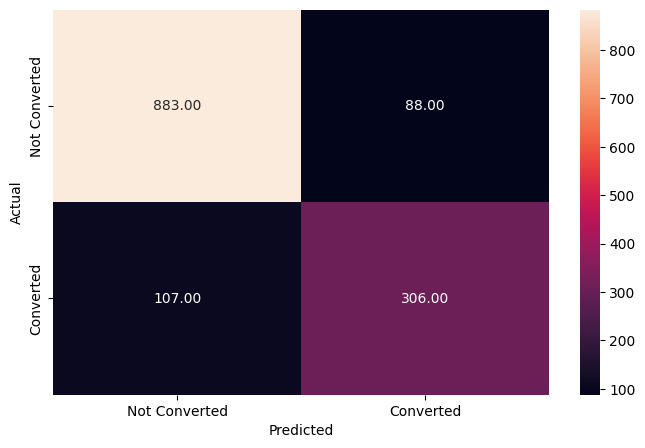

In [ ]:
# --- Model Evaluation: Random Forest on Test Set ---

# Predict classes for the test data using the trained Random Forest model
y_pred_test_rf = rf_estimator.predict(X_test)

# Evaluate model performance on the test set
metrics_score(y_test, y_pred_test_rf)

Observations:

1. **Accuracy**: The test data accuracy is **86%**, a significant drop from the **100%** accuracy on the training data, indicating possible **overfitting** on the training set.
2. **Precision for Converted Leads**: Precision for class 1 (Converted) is **0.78** on the test data, showing the model is fairly good at predicting conversions but still prone to some false positives.
3. **Recall for Converted Leads**: Recall for class 1 (Converted) is **0.74**, meaning the model misses some actual conversions, reflected by the **107 false negatives**.
4. **Confusion Matrix**: The model has **88 false positives** (incorrectly predicting Not Converted as Converted) and **107 false negatives** (missing Converted predictions), showing a more balanced but less perfect performance on unseen data.
5. The model shows signs of overfitting on the training data but generalizes reasonably well on the test data, though there is room for improvement in predicting conversions.

## **Random Forest Hyperparameter tuning**

In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier (class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

# Grid of parameters to choose from
params_rf = {
        "n_estimators": [110, 120],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],'criterion': ['gini', 'entropy']
}

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, max_features=0.7,
                       min_samples_leaf=3, n_estimators=120, random_state=1)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      2264
           1       0.85      0.99      0.92       964

    accuracy                           0.95      3228
   macro avg       0.93      0.96      0.94      3228
weighted avg       0.95      0.95      0.95      3228



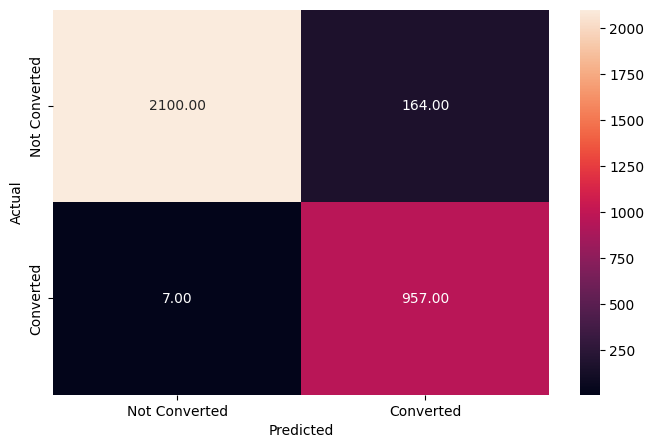

In [ ]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

Key Observations
1. **Accuracy**: The model performs well with **95% accuracy** on the training data.
2. **Precision for Converted Leads**: Precision for class 1 (Converted) is **0.85**, indicating some false positives.
3. **Recall for Converted Leads**: Excellent recall of **0.99**, meaning nearly all actual conversions are captured.
4. **False Positives**: There are **166 false positives**, where non-converted leads were misclassified as converted.
5. **False Negatives**: The model only has **8 false negatives**, meaning very few converted leads were missed.
6. **The tuned random forest model for the training data** performs almost as well as the default hyperparameter model but introduces a more balanced approach by slightly sacrificing precision  to avoid overfitting. The original model's perfect results suggest it might not generalize well, whereas the tuned model likely provides better real-world performance with fewer risks of overfitting.

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       971
           1       0.71      0.79      0.75       413

    accuracy                           0.84      1384
   macro avg       0.81      0.83      0.82      1384
weighted avg       0.85      0.84      0.84      1384



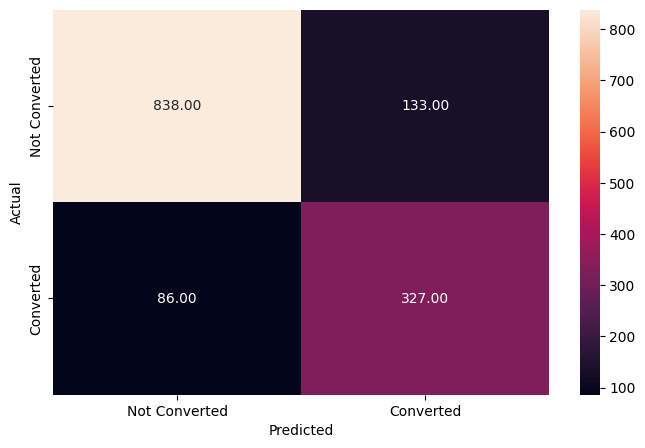

In [ ]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

## Key Observations for Tuned Random Forest Model (Test Data):

1. **Accuracy**: The model achieves a solid **84% accuracy**, indicating good overall performance on the test data.
2. **Precision for Converted Leads**: Precision for class 1 (Converted) is **0.71**, meaning there are some false positives in predicting conversions.
3. **Recall for Converted Leads**: The recall for class 1 is **0.79**, showing that the model successfully captures most actual conversions.
4. **False Positives**: There are **133 false positives**, where non-converted leads were incorrectly classified as converted.
5. **False Negatives**: The model has **86 false negatives**, indicating it missed some actual converted leads but generally performs well in recall.

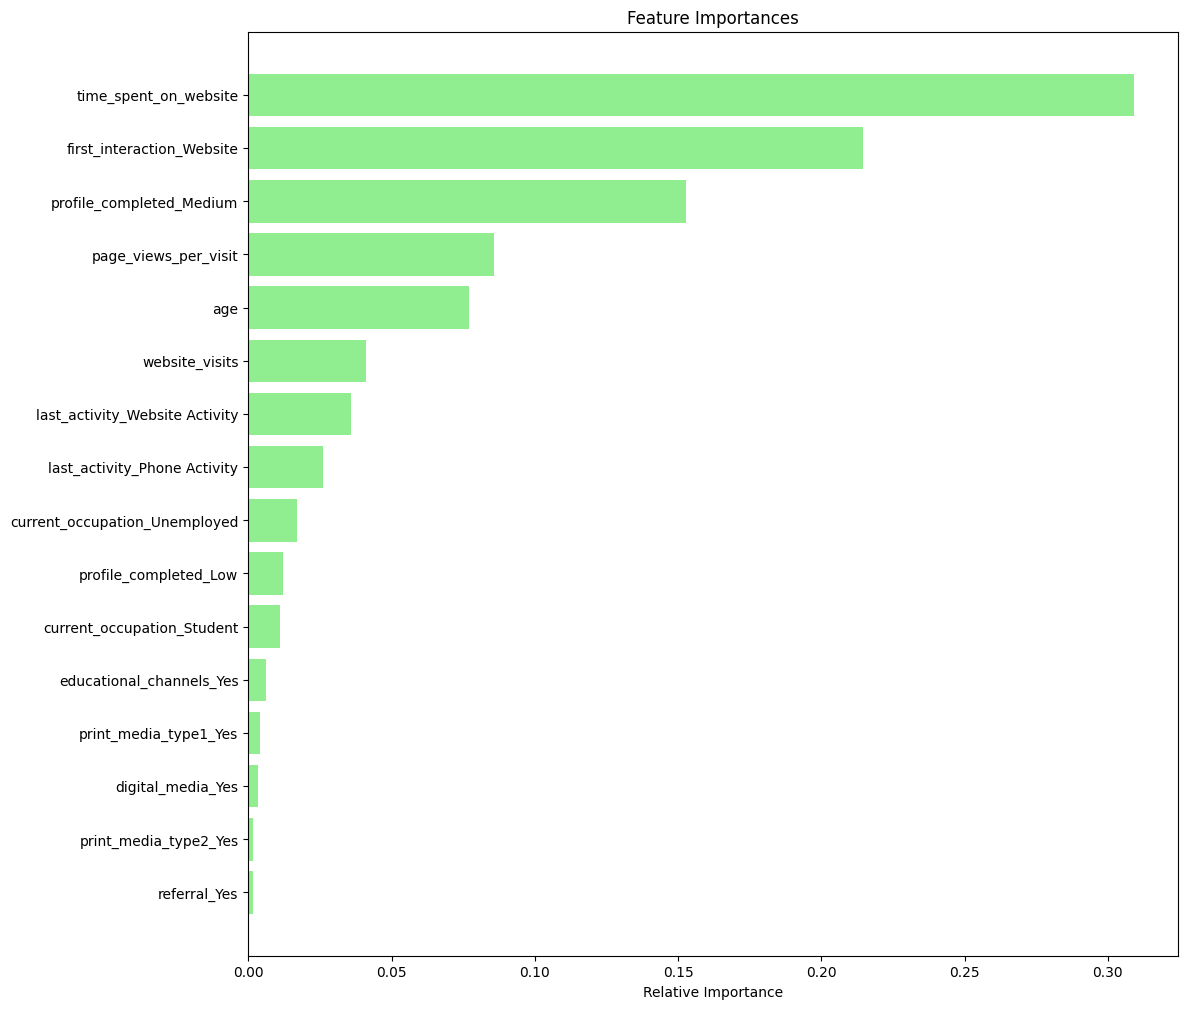

In [ ]:
# Plotting feature importances
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'lightgreen', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()



Observations:

* Similar to the decision tree model, time spent on website, first_interaction_website are the top features that help distinguish between not converted and converted leads.
* Unlike the decision tree, the **random forest** gives some importance to other variables like occupation, profile_completed, and agepage_views_per_visit, as well. This implies that the random forest is giving importance to more factors in comparison to the decision tree.

## Conclusion

* Leads who spend more time on the website are more likely to convert into paying customers.
* The platform through which a lead first interacts with ExtraaLearn significantly impacts conversion. Leads that first engage through the website tend to convert more frequently than those through the mobile app.
* Leads that visit more pages during their website sessions show higher likelihoods of conversion, as observed in the Random Forest and Tuned Decision Tree feature importance analyses.
* Leads with medium or higher levels of profile completion are more likely to convert, suggesting that asking for detailed information during registration may help gauge lead interest and improve targeting.
* Last activity metrics, whether through the website or via phone conversations, also contribute to conversion likelihood. Active engagement with the platform in any form is a predictor of success.

## **Actionable insights and Recommendations:**

* Encourage More Time on Website: Add detailed course content, videos, and interactive features to keep leads engaged longer on the website.

* Prioritize Website as the Main Channel: Focus marketing on driving traffic to the website since it converts more leads than the mobile app. Ensure the website is user-friendly and informative.

* Boost Profile Completion: Offer incentives or reminders for leads to complete their profiles. Higher profile completion increases the likelihood of conversion.

* Improve Lead Nurturing through Engagement: Leads who view more pages or frequently return to the website show higher conversion potential. Use retargeting strategies like reminder emails, special offers, or new content notifications to encourage return visits and deeper engagement.

* Leverage Data-Driven Targeting: Utilize the insights from this analysis to create a lead-scoring system, where leads that engage more deeply with the platform (time spent, page views, profile completion) receive higher scores and are prioritized for sales outreach.

* Monitor Last Activities: Leads that have recently interacted with the platform (via the website or phone) should be prioritized for follow-ups. Setting up automated notifications for the sales team when a lead engages with the platform could enhance conversion rates.

* Target Middle-Aged Professionals: Focus marketing efforts on middle-aged professionals who are more likely to convert, emphasizing career advancement.

* Improve Mobile App: Redesign the mobile app to increase engagement and conversion, as it lags behind the website in performance.
